# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# READING DATA SET

In [3]:
dfa = pd.read_csv("application_data.csv", header = 0)

In [4]:
dfa.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# FUNCTION TO DISPLAY MAX COLUMNS & ROWS

In [5]:
pd.set_option('display.max_columns',130)
pd.set_option('display.max_rows',200)

In [6]:
dfa.nunique()

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

# FINDING THE NULL VALUES 

In [7]:
# percentage of null values

100*(dfa.isnull().mean())

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [8]:
temp = (100*dfa.isnull().mean()).reset_index()
temp.head(3)

,index,0
0,SK_ID_CURR,0.0
1,TARGET,0.0
2,NAME_CONTRACT_TYPE,0.0


In [9]:
temp = temp.rename(columns = {'index': "Column Name", 0:"% Missing Values"})

In [10]:
temp.head(3)

,Column Name,% Missing Values
0,SK_ID_CURR,0.0
1,TARGET,0.0
2,NAME_CONTRACT_TYPE,0.0


In [11]:
temp.sort_values("% Missing Values", ascending = False)

,Column Name,% Missing Values
76,COMMONAREA_MEDI,69.872297
48,COMMONAREA_AVG,69.872297
62,COMMONAREA_MODE,69.872297
70,NONLIVINGAPARTMENTS_MODE,69.432963
56,NONLIVINGAPARTMENTS_AVG,69.432963
84,NONLIVINGAPARTMENTS_MEDI,69.432963
86,FONDKAPREMONT_MODE,68.386172
68,LIVINGAPARTMENTS_MODE,68.354953
54,LIVINGAPARTMENTS_AVG,68.354953
82,LIVINGAPARTMENTS_MEDI,68.354953


# Dropping columns with missing values>45%

In [12]:
drop_cols = temp[temp['% Missing Values']>45]['Column Name']

In [13]:
drop_cols

21                     OWN_CAR_AGE
41                    EXT_SOURCE_1
44                  APARTMENTS_AVG
45                BASEMENTAREA_AVG
46     YEARS_BEGINEXPLUATATION_AVG
47                 YEARS_BUILD_AVG
48                  COMMONAREA_AVG
49                   ELEVATORS_AVG
50                   ENTRANCES_AVG
51                   FLOORSMAX_AVG
52                   FLOORSMIN_AVG
53                    LANDAREA_AVG
54            LIVINGAPARTMENTS_AVG
55                  LIVINGAREA_AVG
56         NONLIVINGAPARTMENTS_AVG
57               NONLIVINGAREA_AVG
58                 APARTMENTS_MODE
59               BASEMENTAREA_MODE
60    YEARS_BEGINEXPLUATATION_MODE
61                YEARS_BUILD_MODE
62                 COMMONAREA_MODE
63                  ELEVATORS_MODE
64                  ENTRANCES_MODE
65                  FLOORSMAX_MODE
66                  FLOORSMIN_MODE
67                   LANDAREA_MODE
68           LIVINGAPARTMENTS_MODE
69                 LIVINGAREA_MODE
70        NONLIVINGA

In [14]:
df1 = dfa.drop(drop_cols, axis=1)

In [15]:
df1.shape

(307511, 73)

In [16]:
# now checking % of missing values again

temp = (100*df1.isnull().mean()).reset_index()
temp = temp.rename(columns = {'index': "Column Name", 0:"% Missing Values"})
temp.sort_values("% Missing Values", ascending = False)

,Column Name,% Missing Values
27,OCCUPATION_TYPE,31.345545
41,EXT_SOURCE_3,19.825307
72,AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
71,AMT_REQ_CREDIT_BUREAU_QRT,13.501631
70,AMT_REQ_CREDIT_BUREAU_MON,13.501631
69,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
68,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
67,AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
11,NAME_TYPE_SUITE,0.420148
42,OBS_30_CNT_SOCIAL_CIRCLE,0.332021


In [17]:
df1.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

In [18]:
temp_col = df1.nunique().reset_index()

In [19]:
temp_col = temp_col.rename(columns = {'index' : 'column name', 0:'unique value'})

In [20]:
temp_col.head(5)

,column name,unique value
0,SK_ID_CURR,307511
1,TARGET,2
2,NAME_CONTRACT_TYPE,2
3,CODE_GENDER,3
4,FLAG_OWN_CAR,2


# Identifying continous & categorical columns
    # con_col => continous columns
    # cat_col => categorical

In [21]:
con_col = list(temp_col[(temp_col['unique value']>58) & (temp_col['unique value']<307511)]['column name'])
cat_col = list(temp_col[(temp_col['unique value']<58)]['column name'])

In [22]:
con_col

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

# Imputation for missing values<45% 

## Continous variables - median 
## Categorical variables - mode

In [23]:
for i in con_col:
    median_=df1[i].median()
    df1[i] = df1[i].fillna(median_)

In [24]:
for i in cat_col:
    mode_=df1[i].mode()[0]
    df1[i] = df1[i].fillna(mode_)

## Checking % of missing value again

In [25]:
temp = (100*df1.isnull().mean()).reset_index()
temp = temp.rename(columns = {'index': "Column Name", 0:"% Missing Values"})
temp.sort_values("% Missing Values", ascending = False)

,Column Name,% Missing Values
0,SK_ID_CURR,0.0
37,REG_CITY_NOT_WORK_CITY,0.0
53,FLAG_DOCUMENT_8,0.0
52,FLAG_DOCUMENT_7,0.0
51,FLAG_DOCUMENT_6,0.0
50,FLAG_DOCUMENT_5,0.0
49,FLAG_DOCUMENT_4,0.0
48,FLAG_DOCUMENT_3,0.0
47,FLAG_DOCUMENT_2,0.0
46,DAYS_LAST_PHONE_CHANGE,0.0


In [26]:
# data set is ready with non null values

df1.shape

(307511, 73)

In [27]:
df1.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [28]:
df1.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

## Checking the values of some categorical columns

In [29]:
df1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [30]:
df1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [31]:
# Replacing "XNA" with "F" as the number of records very less any "F" has high frequecy

df1.CODE_GENDER = df1.CODE_GENDER.replace('XNA', 'F')

In [32]:
df1.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [33]:
df1.columns 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [34]:
# Replacing '0' with 'N', '1' with 'Y' in target column and flag columns so as to get data more readable 

#df1.TARGET =                 dfa.TARGET.replace([0,1],['N','Y'])
df1.FLAG_MOBIL =             dfa.FLAG_MOBIL.replace([0,1],['N','Y'])
df1.FLAG_EMP_PHONE=          dfa.FLAG_EMP_PHONE.replace([0,1],['N','Y'])
df1.FLAG_WORK_PHONE=         dfa.FLAG_WORK_PHONE.replace([0,1],['N','Y'])
df1.FLAG_CONT_MOBILE=        dfa.FLAG_CONT_MOBILE.replace([0,1],['N','Y'])
df1.FLAG_PHONE=              dfa.FLAG_PHONE.replace([0,1],['N','Y'])
df1.FLAG_EMAIL=              dfa.FLAG_EMAIL.replace([0,1],['N','Y'])

In [35]:
# cross checking the values for TARGET variable

df1.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [36]:
# changing the data type from int to object

#df1.TARGET.astype('object')
df1.FLAG_MOBIL.astype('object')
df1.FLAG_EMP_PHONE.astype('object')
df1.FLAG_WORK_PHONE.astype('object')
df1.FLAG_CONT_MOBILE.astype('object')
df1.FLAG_PHONE.astype('object')
df1.FLAG_EMAIL.astype('object')

0         N
1         N
2         N
3         N
4         N
         ..
307506    N
307507    N
307508    Y
307509    N
307510    N
Name: FLAG_EMAIL, Length: 307511, dtype: object

In [37]:
df1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Y,Y,N,Y,Y,N,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Y,Y,Y,Y,Y,N,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Y,Y,N,Y,N,N,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Y,Y,N,Y,N,N,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# replacing 'secondary / secondary special' with 'Secondary education' 

df1.NAME_EDUCATION_TYPE =  df1.NAME_EDUCATION_TYPE.replace('Secondary / secondary special', 'Secondary education')

In [39]:
# replacing 'Single / not married' with 'Single'

df1.NAME_FAMILY_STATUS = df1.NAME_FAMILY_STATUS.replace('Single / not married', 'Single')

In [40]:
# values in column DAYS_BIRTH are -ve
# converting them in +ve by using abs()
# first checking on one variable then applying it to other columns having -ve values

df1.DAYS_BIRTH.abs()

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [41]:
# making a list of columns name having -ve values
# converting them into years rather than days
# appling a for loop 

col_neg = ['DAYS_BIRTH','DAYS_EMPLOYED' ,'DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
for i in col_neg:
    df1[i] = df1[i].abs()
    df1[i] = round(df1[i]/365)

In [42]:
# Cross chekcing above code

df1.DAYS_BIRTH.value_counts()

39.0    9023
38.0    8793
37.0    8727
40.0    8602
41.0    8495
28.0    8467
32.0    8313
42.0    8308
43.0    8265
36.0    8152
44.0    8132
31.0    8021
30.0    7776
35.0    7751
33.0    7729
34.0    7659
29.0    7636
54.0    7489
45.0    7385
46.0    7333
47.0    7202
55.0    7140
53.0    7124
57.0    6926
48.0    6907
49.0    6786
52.0    6740
50.0    6696
56.0    6657
60.0    6612
59.0    6479
51.0    6417
27.0    6413
58.0    6371
61.0    5795
63.0    5467
62.0    5362
64.0    5023
26.0    4364
65.0    4318
25.0    4079
24.0    3815
23.0    3669
66.0    2641
22.0    1990
67.0    1834
68.0    1654
21.0     660
69.0     314
Name: DAYS_BIRTH, dtype: int64

## Checking for columns in dataframe containing "XNA"

In [43]:
# get the list of columns having XNA as values 

df1_xna = df1.columns[df1.isin(['XNA']).any()]

In [44]:
df1_xna

Index(['ORGANIZATION_TYPE'], dtype='object')

In [45]:
#chekcing the number of counts of XNA in ORGANIZATION_TYPE

df1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

# Dropping or removing unwanted columns

In [46]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary education,Single,House / apartment,0.018801,26.0,2.0,10.0,6.0,Y,Y,N,Y,Y,N,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0,3.0,1.0,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary education,Single,House / apartment,0.010032,52.0,1.0,12.0,7.0,Y,Y,Y,Y,Y,N,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary education,Civil marriage,House / apartment,0.008019,52.0,8.0,27.0,7.0,Y,Y,N,Y,N,N,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary education,Single,House / apartment,0.028663,55.0,8.0,12.0,9.0,Y,Y,N,Y,N,N,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# from above we can say columns after DAYS_LAST_PHONE_CHANGE is not having much use. So we can drop it 

# finding the index of those columns

df1.shape

(307511, 73)

In [48]:
# check the index number of the columns to be removed

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [49]:
# we will take records till 46th columns
df1 = df1.iloc[:,:47]


In [50]:
df1.shape

(307511, 47)

# OUTLIERS

## Detecting outliers


## 1. By using boxplots

In [51]:
con_col

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

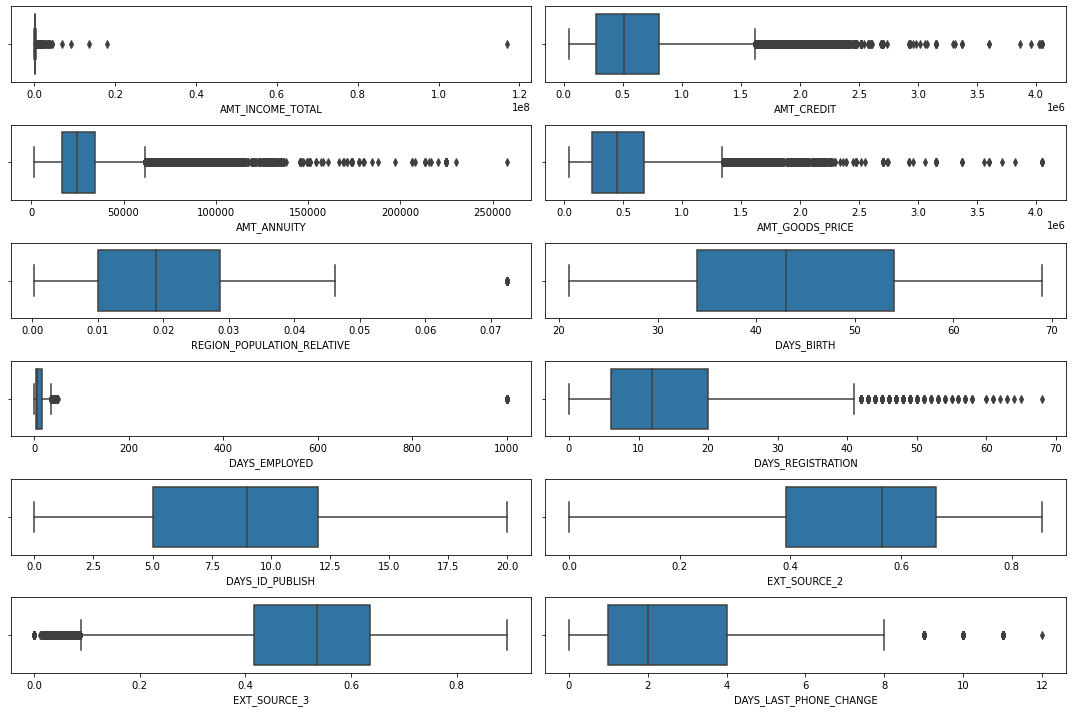

In [52]:
y=0
fig,axes = plt.subplots(6,2, figsize=(15,10))
for i in con_col:    
    sns.boxplot(x = df1[i], ax=axes.flatten()[y])
    plt.xlabel(df1[i].name)
    y=y+1
fig.tight_layout()
plt.show()

## 2. Detecting outliers by IQR 

### Continous variables

In [53]:
# Detecting the total number of outliers in con_col(continous variables)

outliers = []

def detect_outlier(col_name):
    
        q1 = df1[col_name].describe()['25%']
        q3 = df1[col_name].describe()['75%']
        iqr = q3 - q1
        lower_bnd = q1 - (1.5*iqr) 
        upper_bnd = q3 + (1.5*iqr)

        for k in df1[col_name]:
            if (k<lower_bnd or k>upper_bnd):
                    outliers.append(k)
        return outliers
for i in con_col:
    print('Number of outliers in ',i,'are : ', len(detect_outlier(i)))

Number of outliers in  AMT_INCOME_TOTAL are :  14035
Number of outliers in  AMT_CREDIT are :  20597
Number of outliers in  AMT_ANNUITY are :  28101
Number of outliers in  AMT_GOODS_PRICE are :  42829
Number of outliers in  REGION_POPULATION_RELATIVE are :  51241
Number of outliers in  DAYS_BIRTH are :  51241
Number of outliers in  DAYS_EMPLOYED are :  107530
Number of outliers in  DAYS_REGISTRATION are :  108611
Number of outliers in  DAYS_ID_PUBLISH are :  108611
Number of outliers in  EXT_SOURCE_2 are :  108611
Number of outliers in  EXT_SOURCE_3 are :  112924
Number of outliers in  DAYS_LAST_PHONE_CHANGE are :  116490


## Handling the outliers by flooring and capping 

In [54]:
def outlier_treatment(con_col):
    for i in con_col:
        q1=df1[i].describe()["25%"] 
        q3=df1[i].describe()["75%"] 
        iqr=q3-q1
        upper_bound=q3+1.5*iqr
        lower_bound=q1-1.5*iqr
        df1[i]=np.where(df1[i]>upper_bound,upper_bound,df1[i])
        df1[i]=np.where(df1[i]<lower_bound,lower_bound,df1[i])

outlier_treatment(con_col)

In [55]:
for i in con_col:
    print('Number of outliers in ',i,'are : ', len(detect_outlier(i)))

Number of outliers in  AMT_INCOME_TOTAL are :  116490
Number of outliers in  AMT_CREDIT are :  116490
Number of outliers in  AMT_ANNUITY are :  116490
Number of outliers in  AMT_GOODS_PRICE are :  116490
Number of outliers in  REGION_POPULATION_RELATIVE are :  116490
Number of outliers in  DAYS_BIRTH are :  116490
Number of outliers in  DAYS_EMPLOYED are :  116490
Number of outliers in  DAYS_REGISTRATION are :  116490
Number of outliers in  DAYS_ID_PUBLISH are :  116490
Number of outliers in  EXT_SOURCE_2 are :  116490
Number of outliers in  EXT_SOURCE_3 are :  116490
Number of outliers in  DAYS_LAST_PHONE_CHANGE are :  116490


<AxesSubplot:xlabel='AMT_ANNUITY'>

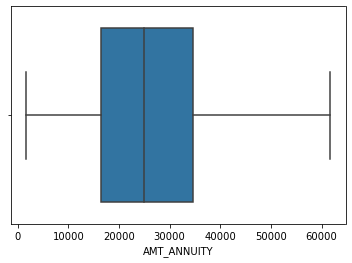

In [56]:
# checking on one variable

sns.boxplot(df1.AMT_ANNUITY)

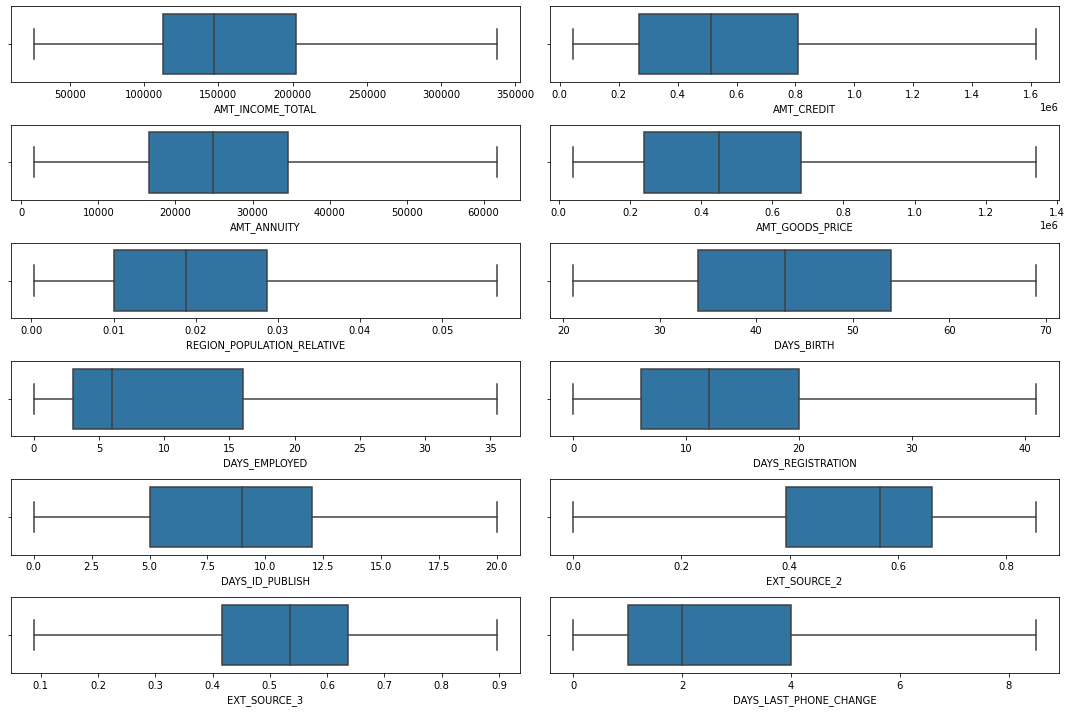

In [57]:
y=0
fig,axes = plt.subplots(6,2, figsize=(15,10))
for i in con_col:    
    sns.boxplot(x = df1[i], ax=axes.flatten()[y])
    plt.xlabel(df1[i].name)
    y=y+1
fig.tight_layout()
plt.show()

## updating cat_col list as we dropped many columns

In [58]:
temp_col1 = df1.nunique().reset_index()
temp_col1

,index,0
0,SK_ID_CURR,307511
1,TARGET,2
2,NAME_CONTRACT_TYPE,2
3,CODE_GENDER,2
4,FLAG_OWN_CAR,2
5,FLAG_OWN_REALTY,2
6,CNT_CHILDREN,15
7,AMT_INCOME_TOTAL,2210
8,AMT_CREDIT,4969
9,AMT_ANNUITY,11674


In [59]:
temp_col1 = temp_col1.rename(columns = {'index' : 'column name', 0:'unique value'})

In [60]:
temp_col1.sort_values('unique value',ascending = False)

,column name,unique value
0,SK_ID_CURR,307511
40,EXT_SOURCE_2,119828
9,AMT_ANNUITY,11674
8,AMT_CREDIT,4969
7,AMT_INCOME_TOTAL,2210
10,AMT_GOODS_PRICE,781
41,EXT_SOURCE_3,599
16,REGION_POPULATION_RELATIVE,81
39,ORGANIZATION_TYPE,58
17,DAYS_BIRTH,49


In [61]:
# finding the categorical column list having unique value < 58

cat_col = list(temp_col1[(temp_col1['unique value']<58)]['column name'])

In [62]:
len(cat_col)

38

### Categorical Variables

In [63]:
# Getting all the column names with int or float dtypes and then identifyng the outliers

cat_col_int = []
for i in cat_col:
    if df1[i].dtype == 'int' or df1[i].dtype =='float':
        cat_col_int.append(i)
cat_col_int

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [64]:
# we will find the outliers in columns with int/float values leaving out the object type columns
# Detecting the total number of outliers in cat_col_int(categorical numerical variables)

outliers = []

def detect_outlier(col_name):
    
        q1 = df1[col_name].describe()['25%']
        q3 = df1[col_name].describe()['75%']
        iqr = q3 - q1
        lower_bnd = q1 - (1.5*iqr) 
        upper_bnd = q3 + (1.5*iqr)

        for k in df1[col_name]:
            if (k<lower_bnd or k>upper_bnd):
                    outliers.append(k)
        return outliers
for i in cat_col_int:
    print('Number of outliers in ',i,'are : ', len(detect_outlier(i)))

Number of outliers in  DAYS_BIRTH are :  0
Number of outliers in  DAYS_EMPLOYED are :  0
Number of outliers in  DAYS_REGISTRATION are :  0
Number of outliers in  DAYS_ID_PUBLISH are :  0
Number of outliers in  CNT_FAM_MEMBERS are :  4007
Number of outliers in  OBS_30_CNT_SOCIAL_CIRCLE are :  23978
Number of outliers in  DEF_30_CNT_SOCIAL_CIRCLE are :  59144
Number of outliers in  OBS_60_CNT_SOCIAL_CIRCLE are :  78708
Number of outliers in  DEF_60_CNT_SOCIAL_CIRCLE are :  104477
Number of outliers in  DAYS_LAST_PHONE_CHANGE are :  104477


In [65]:
cat_outliers = ['CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']

def outlier_treatment(cat_outliers):
    for i in cat_outliers:
        q1=df1[i].describe()["25%"] 
        q3=df1[i].describe()["75%"] 
        iqr=q3-q1
        upper_bound=q3+1.5*iqr
        lower_bound=q1-1.5*iqr
        df1[i]=np.where(df1[i]>upper_bound,upper_bound,df1[i])
        df1[i]=np.where(df1[i]<lower_bound,lower_bound,df1[i])

outlier_treatment(cat_outliers)

## Correlation 

In [66]:
df_corr = df1.corr().sort_values(by = 'TARGET', ascending = False).head(10)

In [67]:
df_corr[['TARGET']]

,TARGET
TARGET,1.000000
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
REG_CITY_NOT_WORK_CITY,0.050994
REG_CITY_NOT_LIVE_CITY,0.044395
LIVE_CITY_NOT_WORK_CITY,0.032518
CNT_CHILDREN,0.019187
OBS_60_CNT_SOCIAL_CIRCLE,0.010612
OBS_30_CNT_SOCIAL_CIRCLE,0.010599
CNT_FAM_MEMBERS,0.008578


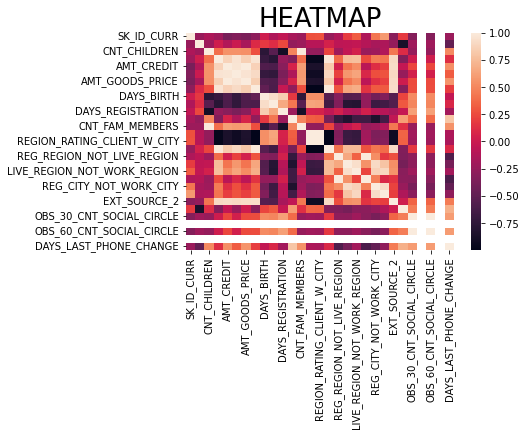

In [68]:
#sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_corr.corr())
plt.title("HEATMAP", size = 26)
plt.show()

#  ANALYSIS

### UNIVARIATE ANALYSIS

#### Continous Variables 
    ## AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE
  
#### Distribution Plot

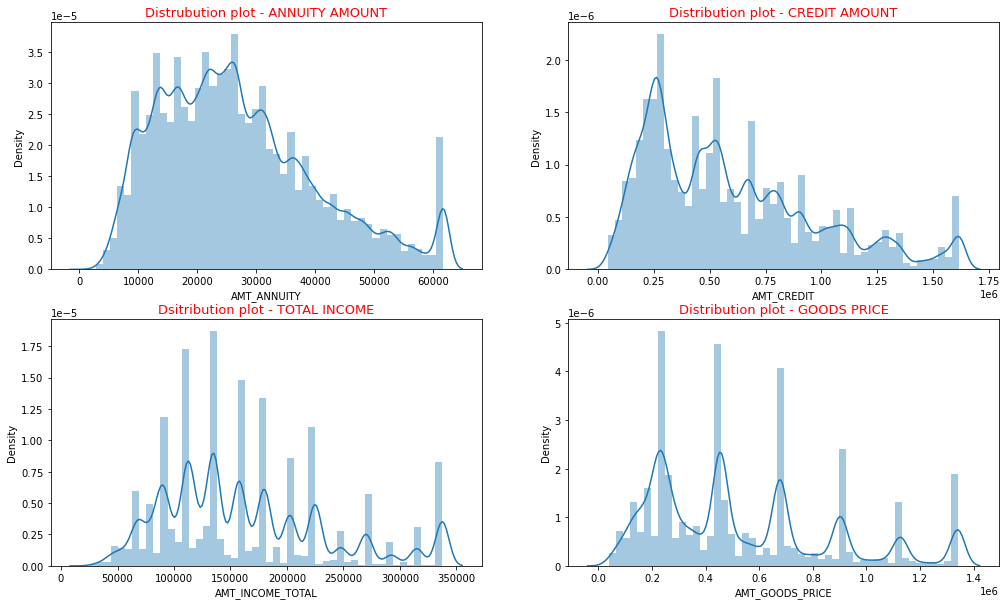

In [69]:
col_plot = ['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE']
fig, axes = plt.subplots(2,2, figsize=(17,10))
y=0
for i in col_plot:
    sns.distplot(df1[i], ax=axes.flatten()[y])
    axes[0][0].set_title("Distrubution plot - ANNUITY AMOUNT", size = 13, color = 'red')
    axes[0][1].set_title("Distribution plot - CREDIT AMOUNT",size = 13, color = 'red')
    axes[1][0].set_title("Dsitribution plot - TOTAL INCOME",size = 13, color = 'red')
    axes[1][1].set_title("Distribution plot - GOODS PRICE",size = 13, color = 'red')
    y=y+1
plt.show()


## Observation:
1. Most of the people taking loans have annuity between 20000 and 30000


## Categorical Columns


### 1. Taking both defaulters and non defaulters 

In [70]:
cat_col

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

## now we will take some categorical columns from the above list to make inferences

In [71]:
categorical_col = ['TARGET',
'NAME_CONTRACT_TYPE',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'NAME_TYPE_SUITE',
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'DAYS_BIRTH',
'DAYS_EMPLOYED','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','ORGANIZATION_TYPE']

In [72]:
# function for plotting bar plot

def cat_plot(col):
    df1[col].value_counts(normalize=True).plot.bar()
    plt.title("Distribtution of %s"%col, size = 13, color = 'red')
    plt.xlabel(df1[col].name)
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

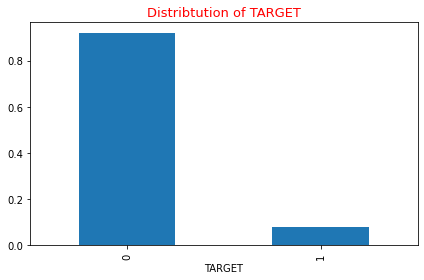

In [73]:
# checking if the function is working correctly
cat_plot('TARGET') 

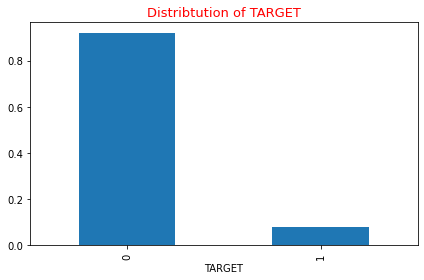

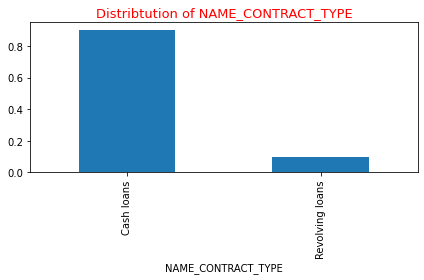

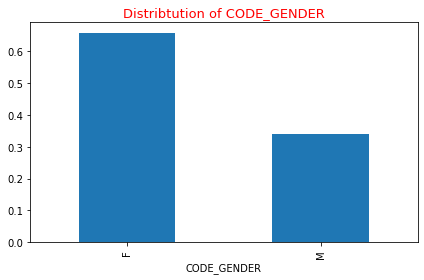

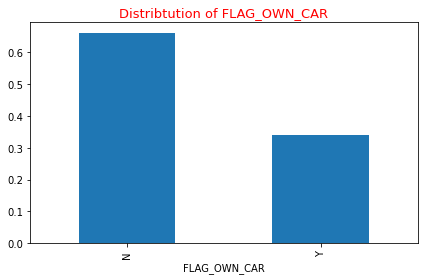

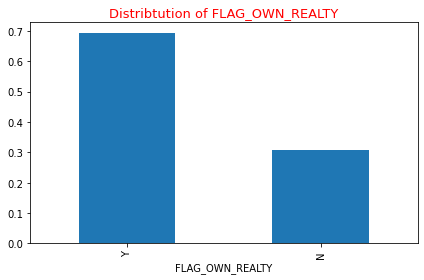

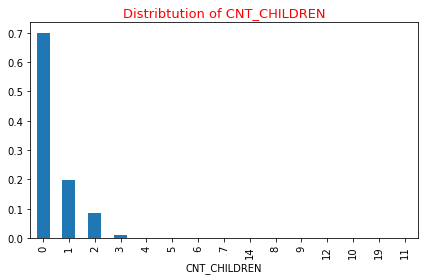

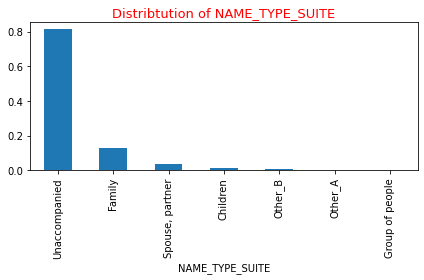

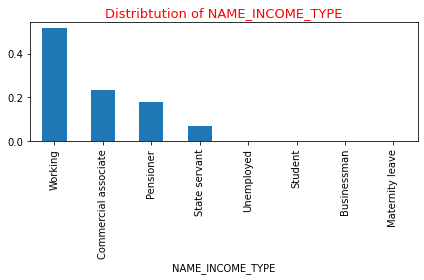

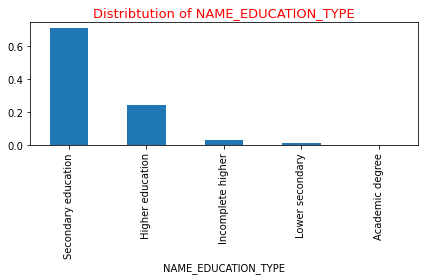

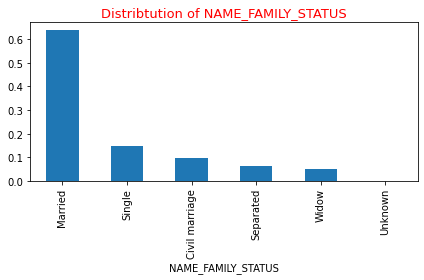

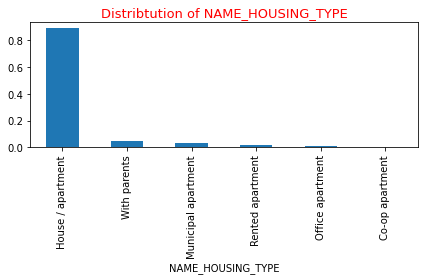

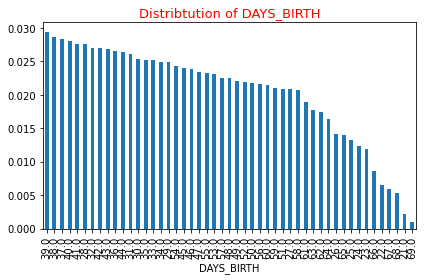

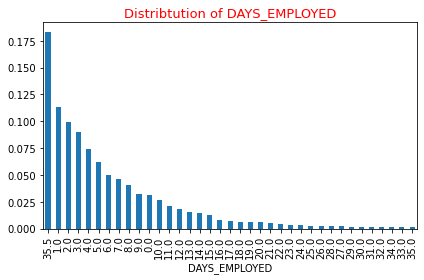

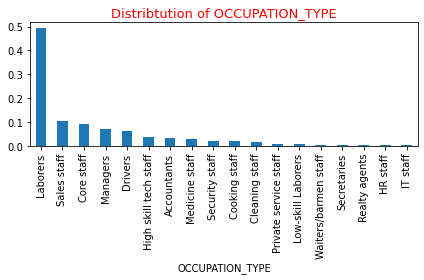

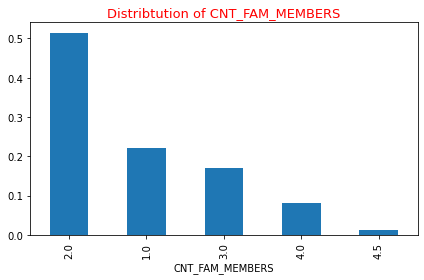

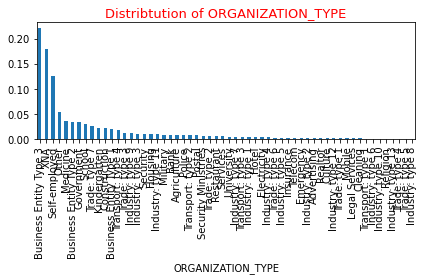

In [74]:
#applying function to each column in categorical_col using loop

for i in categorical_col:
    cat_plot(i)

## Observation
1. Large number of people applying for loans are non defaulters
2. Large number of people applying for cash loans
3. Females applying for loans are approx. two times than males appying for loans
4. Most people appying for the loan doesnot have car
5. Most people applying for the loan have own house
6. Large number of people applying for loan has no child
7. People who are Working are applying for loans as compared to others
8. People appying for the loan, mostly have secondary education
9. Married people are applying for loan more as compared to others
10. People appying for the loan are mostly living in a house/apartment
11. Most of the people applying for the loan are employed for 35.5 years
12. Labourers are applying more for loan as compared to other category
13. Most people appying for the loan have only 2 members in the family
14. Three category of people are majorly appying for loan "Business entity type 3, XNA, Self-employed

### Taking defaluters and non defaluters seperately

#### We will create two dataset one having defaulters data and another having non defaulters data

In [75]:
df1_target_0 = df1[df1["TARGET"]==0]
df1_target_1 = df1[df1['TARGET']==1]
categorical_for_2dataset = ['NAME_CONTRACT_TYPE',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'NAME_TYPE_SUITE',
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'DAYS_BIRTH',
'DAYS_EMPLOYED','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS'
'ORGANIZATION_TYPE']

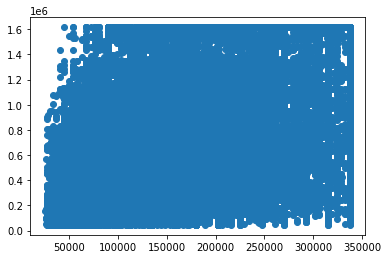

In [76]:
plt.scatter(df1_target_0.AMT_INCOME_TOTAL, df1_target_0.AMT_CREDIT)
plt.show()

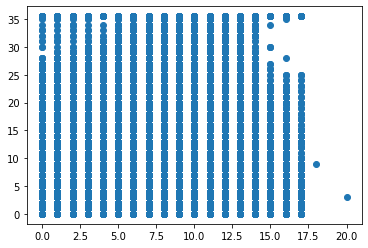

In [77]:
plt.scatter(df1_target_0.DAYS_ID_PUBLISH, df1_target_0.DAYS_EMPLOYED)

In [78]:
## FUNCTION TO PLOT CHART


def plot_variable(name1):
    for name in categorical_for_2dataset:
        if name == name1:
            f, axes = plt.subplots(1, 2, figsize=(12,5))
            
            s1 = sns.countplot(x= name, data=df1_target_1, ax=axes[0], order= df1_target_1[name1].value_counts().index,)   
            axes[0].set_title("COUNTPLOT - DEFAULTERS", size = 15)
            s1.set_xticklabels(s1.get_xticklabels(),rotation = 90)
           
            s2 = sns.countplot(x= name, data=df1_target_0, ax=axes[1], order= df1_target_0[name1].value_counts().index,)
            axes[1].set_title("COUNTPLOT - NON DEFAULTERS", size = 15)
            s2.set_xticklabels(s1.get_xticklabels(),rotation = 90)
            
        else:
            
            exit

    plt.show()

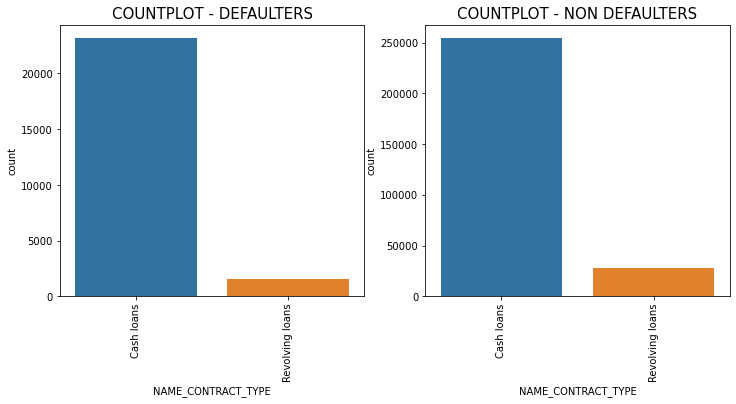

In [79]:
plot_variable('NAME_CONTRACT_TYPE')

#### OBSERVATION: 
Number of  "CASH LOANS" is much higher than "REVOLVING LOANS" for both the target variables 

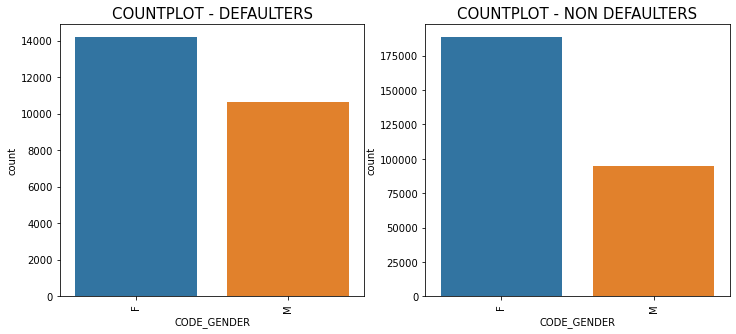

In [80]:
plot_variable('CODE_GENDER')

#### OBSERVATION: 
Number of "FEMALE" taking loans is much higer than the number of "MAN" for both the target variables

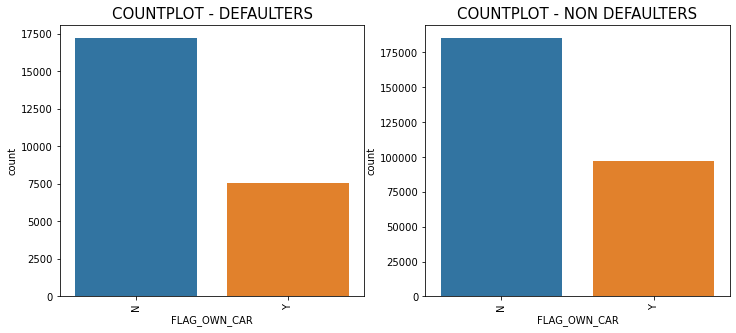

In [81]:
plot_variable('FLAG_OWN_CAR')

#### OBSERVATION: 
1. People applying for the loan is much higher  for who, "DONOT OWN CAR"
2. Most people applying for the loan and "OWN CAR" are "NON DEFUALTER" 

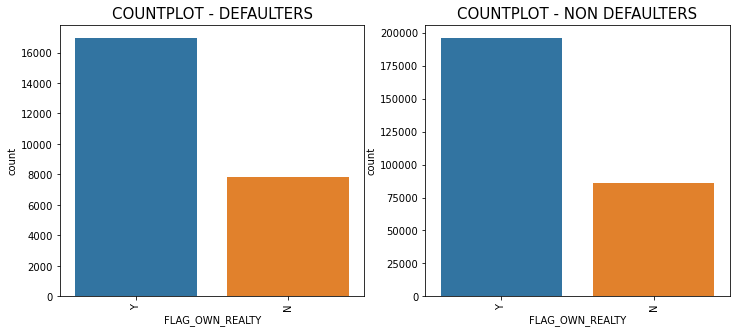

In [82]:
plot_variable('FLAG_OWN_REALTY')

#### OBERSERVATION
Most of the people whether defaulter or non defaulter having 'OWN HOUSE' apply for the loans.

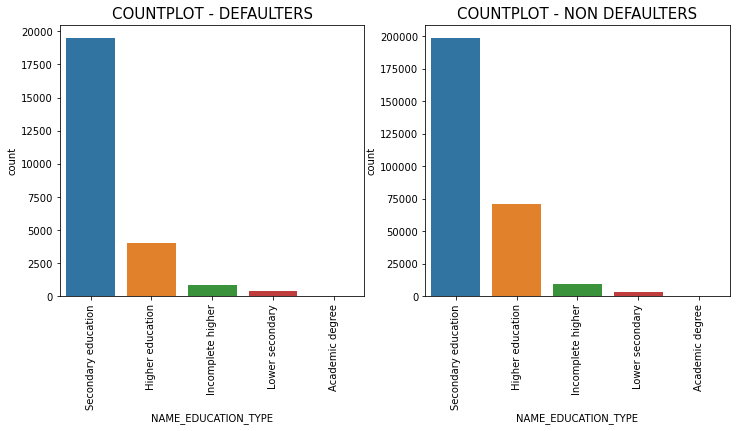

In [83]:
plot_variable( 'NAME_EDUCATION_TYPE')

#### OBSERVATION
1. People having 'academic degree' take loans are non defaulter. So they can be targeted
2. Most people applying for the loans are having "SECONDARY/SECONDARY SPECIAL" education
2. People having 'Higher Education' have less payment difficulties.

In [84]:
# giving error
#plot_variable('NAME_INCOME_TYPE')

In [85]:
#giving error
#plot_variable('NAME_FAMILY_STATUS')


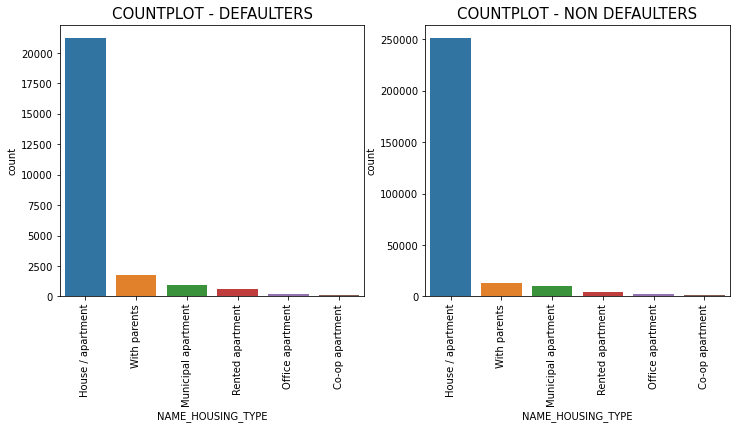

In [86]:
plot_variable('NAME_HOUSING_TYPE')

#### OBSERVATION
1. Large number of people applying for loans have there own 'HOUSE/APARTMENT'
2. People living 'WITH PARENTS' are more likely to have payment difficulties.

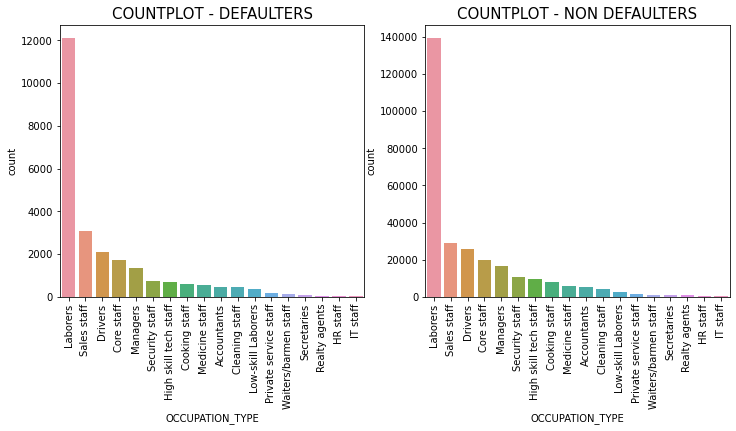

In [87]:
plot_variable('OCCUPATION_TYPE')

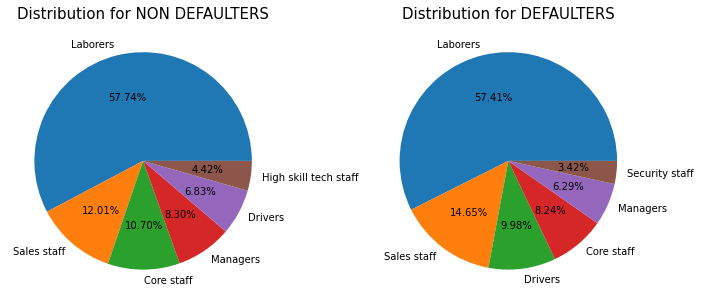

In [88]:
## Subplots for pie charts

f, axes = plt.subplots(1,2, figsize=(12,5))

axes[0].pie(df1_target_0['OCCUPATION_TYPE'].value_counts().head(6), labels = df1_target_0['OCCUPATION_TYPE'].value_counts().head(6).index, autopct='%1.2f%%')   
axes[0].set_title("Distribution for NON DEFAULTERS", size = 15)

axes[1].pie(df1_target_1['OCCUPATION_TYPE'].value_counts().head(6), labels = df1_target_1['OCCUPATION_TYPE'].value_counts().head(6).index, autopct='%1.2f%%')
axes[1].set_title("Distribution for DEFAULTERS", size = 15)
plt.show()                                                                        

#### OBSERVATION
1 From the pie chart above we can infer that we should accept the applications of Non Defaulter where % is higher

##### 1.Core Staff - 5.34% higher than defaulters
##### 2.Managers - 1.94% higher than defaulters
##### 3.High skill tech staff - Not listed in Defaulters list as we have taken only 6 maxmimum values

# Bivariate & Multivariate Analysis

In [89]:
con_col

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

In [90]:
categorical_col

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'ORGANIZATION_TYPE']

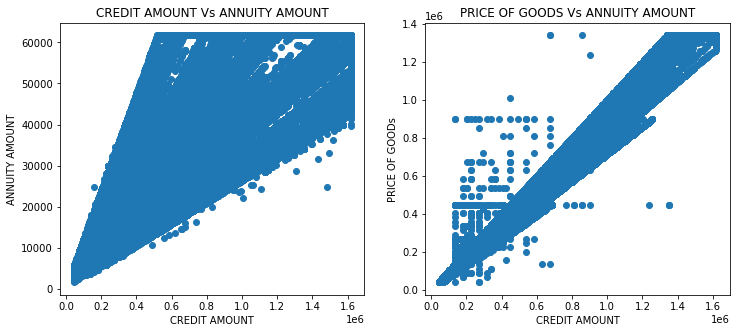

In [160]:
fig, axes = plt.subplots(1,2, figsize = (12,5))

axes[0].scatter(df1.AMT_CREDIT, df1.AMT_ANNUITY)
axes[0].set_title("CREDIT AMOUNT Vs ANNUITY AMOUNT")
axes[1].scatter(df1.AMT_CREDIT, df1.AMT_GOODS_PRICE)
axes[1].set_title("PRICE OF GOODS Vs ANNUITY AMOUNT")
axes[0].set_xlabel("CREDIT AMOUNT")
axes[1].set_xlabel("CREDIT AMOUNT")
axes[0].set_ylabel("ANNUITY AMOUNT")
axes[1].set_ylabel("PRICE OF GOODs")
plt.show()

## Observation
1. Higher is the amount of loan, higher will be the insallment/annuity to be paid

## NOW WE WILL TRY TO FIND OUT THE DEFAULTERS
### WE WILL TAKE THE DATASET FOR TARGET = 1

<AxesSubplot:xlabel='CODE_GENDER,TARGET'>

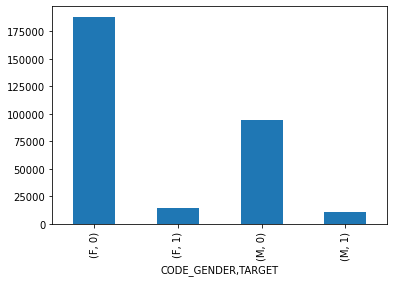

In [92]:
df1.groupby(['CODE_GENDER'])['TARGET'].value_counts().plot.bar()


## Obeservation:
1. Number of female defaulter and non defaulter are more than males

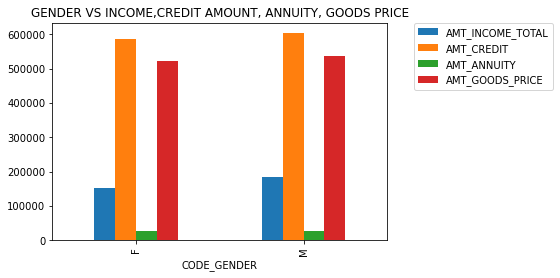

In [93]:
d2 = df1.groupby(['CODE_GENDER']).mean()[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]
d2.plot.bar()
plt.title("GENDER VS INCOME,CREDIT AMOUNT, ANNUITY, GOODS PRICE")
plt.legend(bbox_to_anchor= (1.51,1.02))
plt.show()                                         

## Observation:
Income of male is pretty higher than of female so we can say that males have less loan payment difficulty. Males can get loan easily as compared to female.

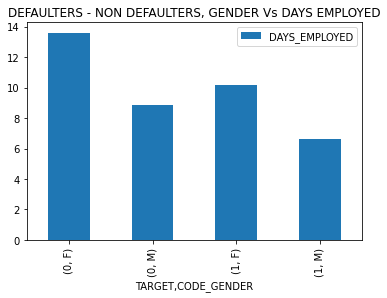

In [94]:
d6 = df1.groupby(['TARGET','CODE_GENDER']).mean()[['DAYS_EMPLOYED']]
d6.plot.bar()
plt.title("DEFAULTERS - NON DEFAULTERS, GENDER Vs DAYS EMPLOYED")
plt.show()

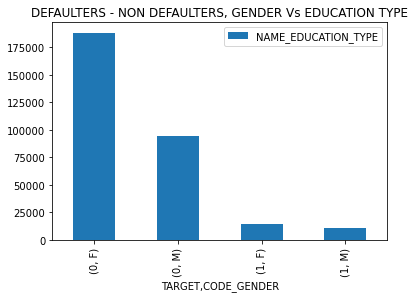

In [95]:
d7 = df1.groupby(['TARGET','CODE_GENDER']).count()[['NAME_EDUCATION_TYPE']]
d7.plot.bar()
plt.title("DEFAULTERS - NON DEFAULTERS, GENDER Vs EDUCATION TYPE")
plt.show()

## Observation:
1. Most of the Non defaulter women are educated as compared to males. 
2. Females employed days are higher than males

#### Insight:
1. Women who are educated works for a longer period in any organization

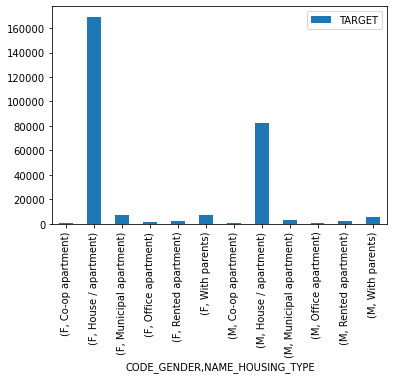

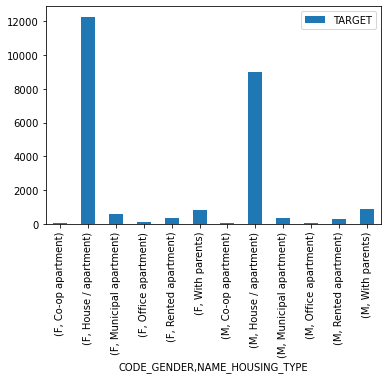

In [96]:
d7 = df1_target_0.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).count()[['TARGET']]
d8 = df1_target_1.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).count()[['TARGET']]
d7.plot.bar()
d8.plot.bar()
plt.show()

## Observation:
1. Number of non defaulter Female living in apartment / house, applying for the loan is higher as compared to male.



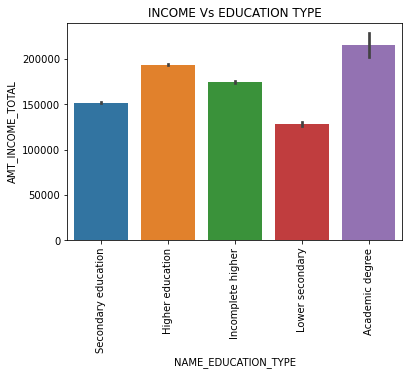

In [97]:
#d = df1.groupby(['NAME_EDUCATION_TYPE']).median()[['AMT_ANNUAL_INCOME']]
sns.barplot(data = df1, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL')
plt.title('INCOME Vs EDUCATION TYPE')
plt.xticks(rotation = 90)
plt.show()

## Observation:
1. People having academic degree have high median salary. So people with Academic Degree can be targetted

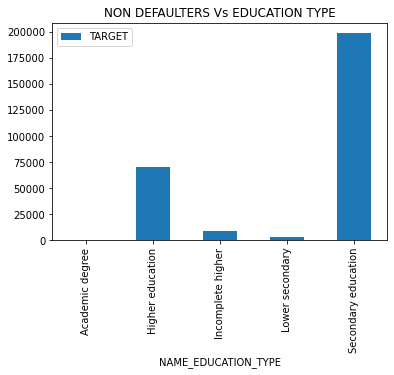

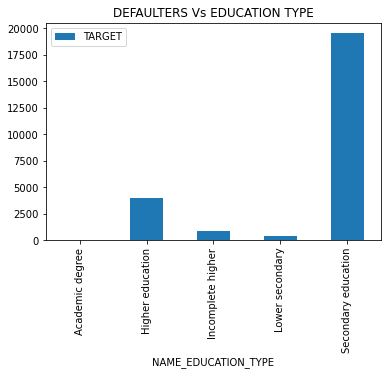

In [98]:
d1 = df1_target_0.groupby(['NAME_EDUCATION_TYPE']).count()[['TARGET']]
d2 = df1_target_1.groupby(['NAME_EDUCATION_TYPE']).count()[['TARGET']]
d1.plot.bar()
plt.title("NON DEFAULTERS Vs EDUCATION TYPE")
d2.plot.bar()
plt.title("DEFAULTERS Vs EDUCATION TYPE")
plt.show()

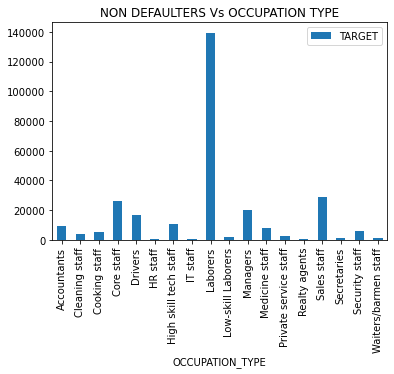

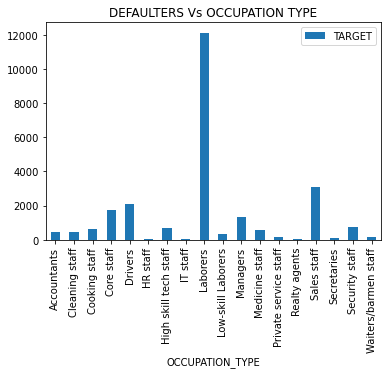

In [99]:
d1 = df1_target_0.groupby(['OCCUPATION_TYPE']).count()[['TARGET']]
d2 = df1_target_1.groupby(['OCCUPATION_TYPE']).count()[['TARGET']]
d1.plot.bar()
plt.title("NON DEFAULTERS Vs OCCUPATION TYPE")
d2.plot.bar()
plt.title("DEFAULTERS Vs OCCUPATION TYPE")
plt.show()

In [100]:
d1 = df1.groupby('NAME_EDUCATION_TYPE')['OCCUPATION_TYPE'].value_counts().sort_values(ascending = False).head(8)

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE,OCCUPATION_TYPE'>

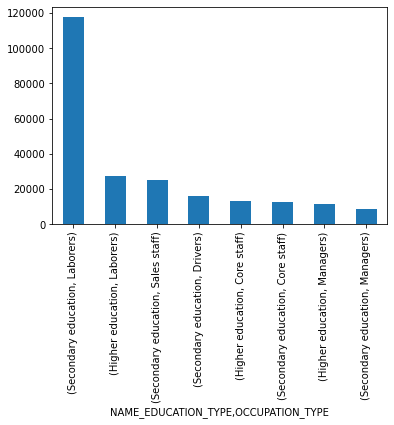

In [101]:
d1.plot.bar()

## Observation
1. Maximum number of people applying for the loans are labourers having secondary education for both defaulters and non defaulters

<AxesSubplot:xlabel='CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE'>

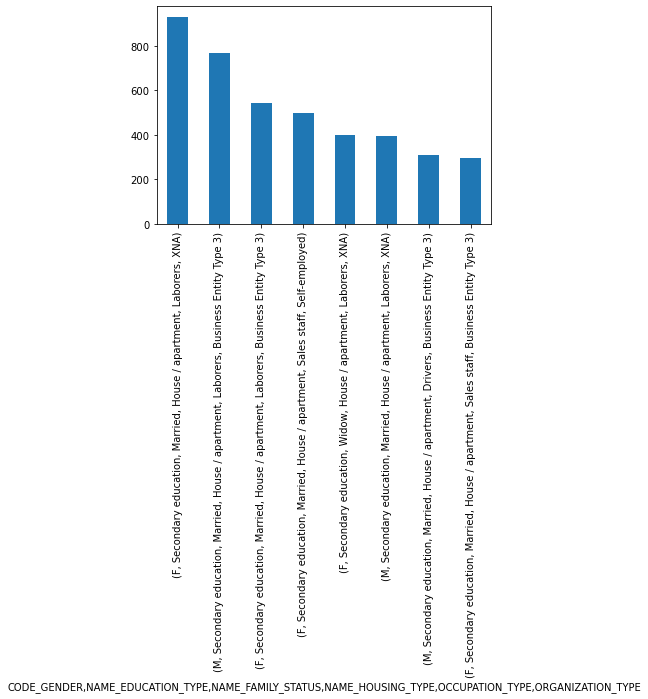

In [102]:
# TAKING TARGET = 1 DATASET TO AS GET INSIGHT FOR DEFUALTERS

d1 = df1_target_1.groupby(['CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'])['ORGANIZATION_TYPE'].value_counts().sort_values(ascending = False).head(8)
d1.plot.bar()

## Observation:
1. Number of non defaulter females having secondary education who are married and living in a apartment are applying for the loan and job is XNA, is highest.

2. Number of non defaulter females having secondary education who married and living in a house/apartment having business entity is second highest.

3. Number of non defaluter males having secondary education who married and living in a house/apartment having business entity is third highest.

#### Making bucket from age column

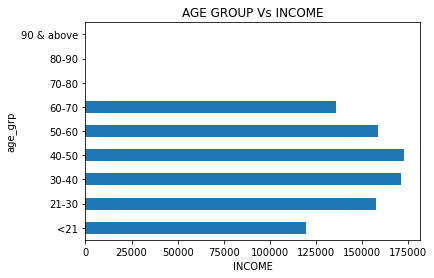

In [103]:
df1['age_grp'] = pd.cut(df1.DAYS_BIRTH, [0,21,30,40,50,60,70,80,90,999], labels=['<21','21-30','30-40','40-50','50-60','60-70','70-80','80-90','90 & above'])
df1.groupby('age_grp')['AMT_INCOME_TOTAL'].mean().plot.barh()
plt.title("AGE GROUP Vs INCOME")
plt.xlabel("INCOME")
plt.show()

## Observation:
1. Maximum number of the people applying for the loan are between 40-50 age and have high mean salary

In [104]:
dfpa = pd.read_csv('previous_application.csv', header = 0)
dfpa.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


## Finding the missing values

## Dropping columns with missing values above 45%

In [105]:
temp = (100*dfpa.isnull().mean().sort_values(ascending = False)).reset_index()
temp.head(10)

,index,0
0,RATE_INTEREST_PRIVILEGED,99.643698
1,RATE_INTEREST_PRIMARY,99.643698
2,AMT_DOWN_PAYMENT,53.636480
3,RATE_DOWN_PAYMENT,53.636480
4,NAME_TYPE_SUITE,49.119754
5,NFLAG_INSURED_ON_APPROVAL,40.298129
6,DAYS_TERMINATION,40.298129
7,DAYS_LAST_DUE,40.298129
8,DAYS_LAST_DUE_1ST_VERSION,40.298129
9,DAYS_FIRST_DUE,40.298129


In [106]:
temp = temp.rename(columns = {'index': 'column name',0:'% missing value'})
temp.head(5)

,column name,% missing value
0,RATE_INTEREST_PRIVILEGED,99.643698
1,RATE_INTEREST_PRIMARY,99.643698
2,AMT_DOWN_PAYMENT,53.636480
3,RATE_DOWN_PAYMENT,53.636480
4,NAME_TYPE_SUITE,49.119754


In [107]:
drop_cols = temp[temp['% missing value']>45]['column name']
drop_cols

0    RATE_INTEREST_PRIVILEGED
1       RATE_INTEREST_PRIMARY
2            AMT_DOWN_PAYMENT
3           RATE_DOWN_PAYMENT
4             NAME_TYPE_SUITE
Name: column name, dtype: object

In [108]:
df2 = dfpa.drop(drop_cols, axis=1)

In [109]:
df2.shape

(1670214, 32)

In [110]:
temp = (100*df2.isnull().mean().sort_values(ascending = False)).reset_index()
temp = temp.rename(columns = {'index': 'column name', 0:'% missing values'})
temp

,column name,% missing values
0,NFLAG_INSURED_ON_APPROVAL,40.298129
1,DAYS_LAST_DUE,40.298129
2,DAYS_FIRST_DRAWING,40.298129
3,DAYS_LAST_DUE_1ST_VERSION,40.298129
4,DAYS_FIRST_DUE,40.298129
5,DAYS_TERMINATION,40.298129
6,AMT_GOODS_PRICE,23.081773
7,AMT_ANNUITY,22.286665
8,CNT_PAYMENT,22.286366
9,PRODUCT_COMBINATION,0.020716


In [111]:
df2.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE                         8
SELLERPLACE_AREA                  2097
NAME_SELLER_INDUSTRY                11
CNT_PAYMENT                         49
NAME_YIELD_GROUP                     5
PRODUCT_COMBINATION      

In [112]:
temp_col_pa = df2.nunique().sort_values(ascending = True).reset_index()
temp_col_pa = temp_col_pa.rename(columns = {'index':'column name', 0:'unique value'})
temp_col_pa

,column name,unique value
0,NFLAG_INSURED_ON_APPROVAL,2
1,FLAG_LAST_APPL_PER_CONTRACT,2
2,NFLAG_LAST_APPL_IN_DAY,2
3,NAME_PRODUCT_TYPE,3
4,NAME_CONTRACT_TYPE,4
5,NAME_CLIENT_TYPE,4
6,NAME_PAYMENT_TYPE,4
7,NAME_CONTRACT_STATUS,4
8,NAME_YIELD_GROUP,5
9,NAME_PORTFOLIO,5


In [113]:
con_col_pa = list(temp_col_pa[(temp_col_pa['unique value']>49) & (temp_col_pa['unique value']<=357959)]['column name'])
cat_col_pa = list(temp_col_pa[(temp_col_pa['unique value']<=49)]['column name'])

## Imputation for missing values<40%

1. Continous variables - median
2. Categorical variables - mode


In [114]:
# list of continuous columns for previous application data set

con_col_pa  

['SELLERPLACE_AREA',
 'DAYS_TERMINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_LAST_DUE',
 'DAYS_FIRST_DUE',
 'DAYS_DECISION',
 'DAYS_LAST_DUE_1ST_VERSION',
 'AMT_CREDIT',
 'AMT_APPLICATION',
 'AMT_GOODS_PRICE',
 'SK_ID_CURR',
 'AMT_ANNUITY']

In [115]:
con_col_pa.remove('SK_ID_CURR')

In [116]:
#list after removing 'SK_ID_CURR'

con_col_pa

['SELLERPLACE_AREA',
 'DAYS_TERMINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_LAST_DUE',
 'DAYS_FIRST_DUE',
 'DAYS_DECISION',
 'DAYS_LAST_DUE_1ST_VERSION',
 'AMT_CREDIT',
 'AMT_APPLICATION',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY']

In [117]:
# list of continuous columns for previous application data set

cat_col_pa

['NFLAG_INSURED_ON_APPROVAL',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_PRODUCT_TYPE',
 'NAME_CONTRACT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_PAYMENT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_YIELD_GROUP',
 'NAME_PORTFOLIO',
 'WEEKDAY_APPR_PROCESS_START',
 'CHANNEL_TYPE',
 'CODE_REJECT_REASON',
 'NAME_SELLER_INDUSTRY',
 'PRODUCT_COMBINATION',
 'HOUR_APPR_PROCESS_START',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_GOODS_CATEGORY',
 'CNT_PAYMENT']

In [118]:
for i in con_col_pa:
    median_=df2[i].median()
    df2[i] = df2[i].fillna(median_)

for i in cat_col_pa:
    mode_=df2[i].mode()[0]
    df2[i] = df2[i].fillna(mode_)

## checking missing values again

In [119]:
temp = (100*df2.isnull().mean().sort_values(ascending = False)).reset_index()
temp = temp.rename(columns = {'index': 'column name', 0:'% missing values'})
temp

,column name,% missing values
0,SK_ID_PREV,0.0
1,SK_ID_CURR,0.0
2,DAYS_TERMINATION,0.0
3,DAYS_LAST_DUE,0.0
4,DAYS_LAST_DUE_1ST_VERSION,0.0
5,DAYS_FIRST_DUE,0.0
6,DAYS_FIRST_DRAWING,0.0
7,PRODUCT_COMBINATION,0.0
8,NAME_YIELD_GROUP,0.0
9,CNT_PAYMENT,0.0


In [120]:
df2.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,365243.0,-831.0,-361.0,-537.0,-499.0,0.0


### Converting (-)ve values in (+)ve 

In [121]:
neg_col_pa = ['DAYS_DECISION','SELLERPLACE_AREA','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']
for i in neg_col_pa:
    df2[i] = df2[i].abs()

In [122]:
# Checking for the (-)ve values

df2.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,1,XNA,24.0,high,Cash Street: high,365243.0,831.0,361.0,537.0,499.0,0.0


# OUTLIERS
## Detecting outliers
### 1. By using boxplots

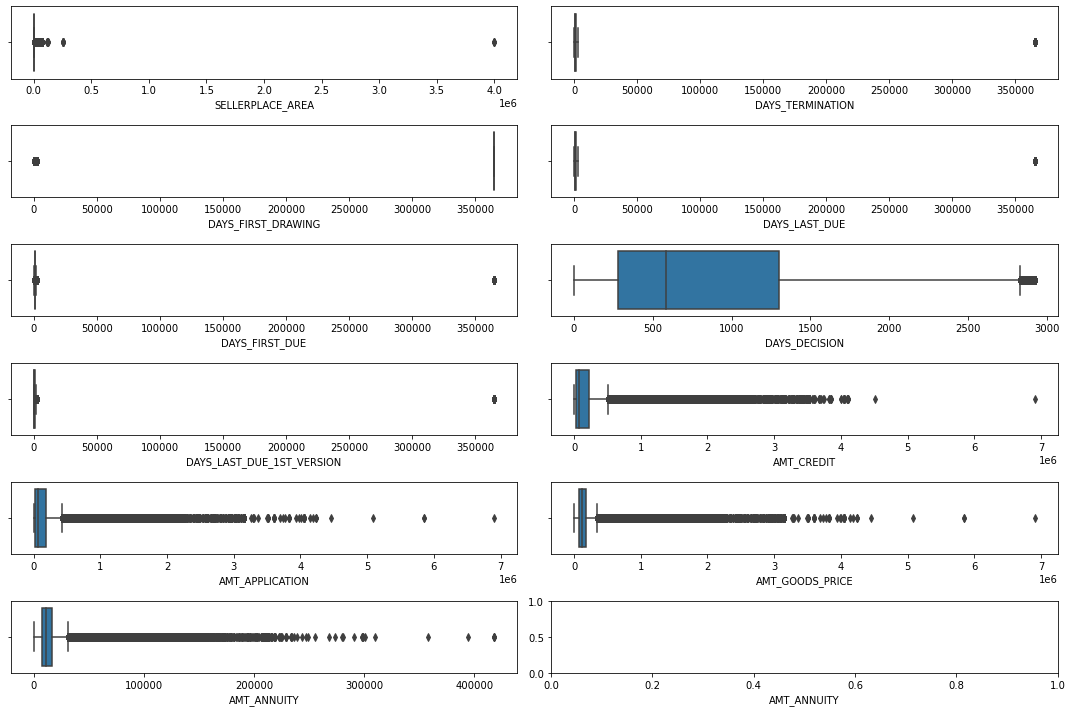

In [123]:
y=0
fig,axes = plt.subplots(6,2, figsize=(15,10))
for i in con_col_pa:    
    sns.boxplot(x = df2[i], ax=axes.flatten()[y])
    plt.xlabel(df2[i].name)
    y=y+1
fig.tight_layout()
plt.show()

## 2. Detecting outliers by IQR 

### Continous variables

In [124]:
# Detecting the total number of outliers in con_col_pa(continous variables)

outliers = []

def detect_outlier(col_name):
    
        q1 = df2[col_name].describe()['25%']
        q3 = df2[col_name].describe()['75%']
        iqr = q3 - q1
        lower_bnd = q1 - (1.5*iqr) 
        upper_bnd = q3 + (1.5*iqr)

        for k in df2[col_name]:
            if (k<lower_bnd or k>upper_bnd):
                    outliers.append(k)
        return outliers
for i in con_col_pa:
    print('Number of outliers in ',i,'are : ', len(detect_outlier(i)))

Number of outliers in  SELLERPLACE_AREA are :  269098
Number of outliers in  DAYS_TERMINATION are :  495011
Number of outliers in  DAYS_FIRST_DRAWING are :  557716
Number of outliers in  DAYS_LAST_DUE are :  768937
Number of outliers in  DAYS_FIRST_DUE are :  1106761
Number of outliers in  DAYS_DECISION are :  1124332
Number of outliers in  DAYS_LAST_DUE_1ST_VERSION are :  1334881
Number of outliers in  AMT_CREDIT are :  1514870
Number of outliers in  AMT_APPLICATION are :  1722889
Number of outliers in  AMT_GOODS_PRICE are :  1958924
Number of outliers in  AMT_ANNUITY are :  2121544


## Handling outliers

In [125]:
def outlier_treatment(con_col_pa):
    for i in con_col_pa:
        q1=df2[i].describe()["25%"] 
        q3=df2[i].describe()["75%"] 
        iqr=q3-q1
        upper_bound=q3+1.5*iqr
        lower_bound=q1-1.5*iqr
        df2[i]=np.where(df2[i]>upper_bound,upper_bound,df2[i])
        df2[i]=np.where(df2[i]<lower_bound,lower_bound,df2[i])

outlier_treatment(con_col_pa)

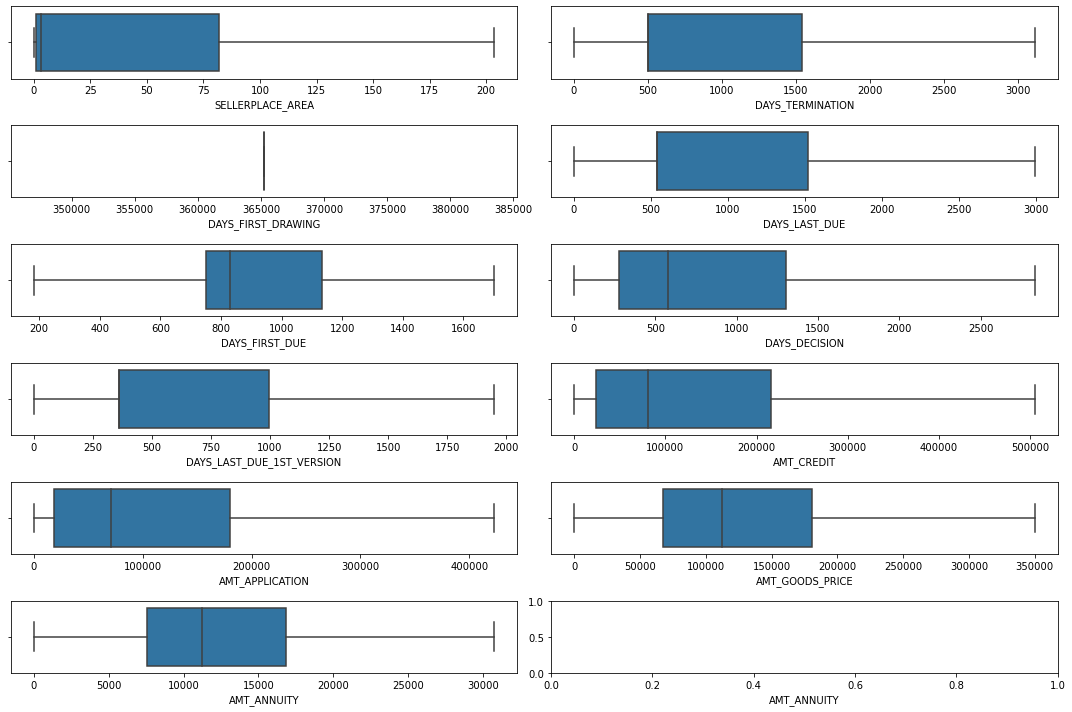

In [126]:
y=0
fig,axes = plt.subplots(6,2, figsize=(15,10))
for i in con_col_pa:    
    sns.boxplot(x = df2[i], ax=axes.flatten()[y])
    plt.xlabel(df2[i].name)
    y=y+1
fig.tight_layout()
plt.show()

In [127]:
df2.corr()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.000000,-0.000321,0.007681,-0.001708,-0.000585,0.009134,-0.002652,-0.002828,-0.019106,-0.021235,0.009506,NaN,-0.010206,-0.020863,-0.021061,-0.021599,-0.015672
SK_ID_CURR,-0.000321,1.000000,0.000541,0.000673,0.000550,0.000835,0.002842,0.000098,0.000639,-0.000165,0.000027,NaN,-0.000375,-0.000189,-0.000848,-0.000640,0.000341
AMT_ANNUITY,0.007681,0.000541,1.000000,0.798277,0.822025,0.856074,-0.038757,0.018802,-0.236073,-0.244271,0.469728,NaN,-0.251331,-0.237806,-0.112665,-0.108899,0.206357
AMT_APPLICATION,-0.001708,0.000673,0.798277,1.000000,0.941220,0.931341,-0.017123,0.003306,-0.116941,-0.121258,0.665883,NaN,-0.205474,-0.150112,0.016727,0.016139,0.244597
AMT_CREDIT,-0.000585,0.000550,0.822025,0.941220,1.000000,0.905632,-0.026960,-0.047352,-0.116641,-0.170564,0.637361,NaN,-0.189744,-0.091781,0.048804,0.058785,0.233365
AMT_GOODS_PRICE,0.009134,0.000835,0.856074,0.931341,0.905632,1.000000,-0.048807,-0.015804,-0.267373,-0.266433,0.655683,NaN,-0.260740,-0.239022,-0.067834,-0.061414,0.175419
HOUR_APPR_PROCESS_START,-0.002652,0.002842,-0.038757,-0.017123,-0.026960,-0.048807,1.000000,0.005789,0.039978,0.120319,-0.041831,NaN,0.009474,0.014709,0.014335,0.014732,-0.063419
NFLAG_LAST_APPL_IN_DAY,-0.002828,0.000098,0.018802,0.003306,-0.047352,-0.015804,0.005789,1.000000,-0.016535,0.007836,0.058594,NaN,0.015980,0.030609,0.030284,0.031190,0.021413
DAYS_DECISION,-0.019106,0.000639,-0.236073,-0.116941,-0.116641,-0.267373,0.039978,-0.016535,1.000000,0.293999,-0.169469,NaN,0.730687,0.668311,0.296969,0.287738,0.170905
SELLERPLACE_AREA,-0.021235,-0.000165,-0.244271,-0.121258,-0.170564,-0.266433,0.120319,0.007836,0.293999,1.000000,-0.182696,NaN,0.157287,0.158770,0.125824,0.124119,-0.096230


# Univariate Analysis

### Continous Variable

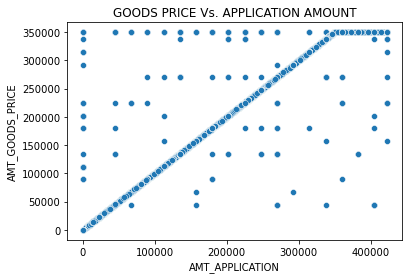

In [128]:
sns.scatterplot(df2.AMT_APPLICATION,df2.AMT_GOODS_PRICE)
plt.title("GOODS PRICE Vs. APPLICATION AMOUNT")
plt.show()

# Observation:

As the price of goods increases amount of application of loan also increases. 

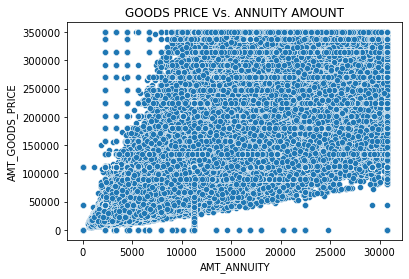

In [129]:
sns.scatterplot(df2.AMT_ANNUITY,df2.AMT_GOODS_PRICE)
plt.title("GOODS PRICE Vs. ANNUITY AMOUNT")
plt.show()

## Observation:
Positive corelation showing as price of goods increases, amount of annuity also increases.

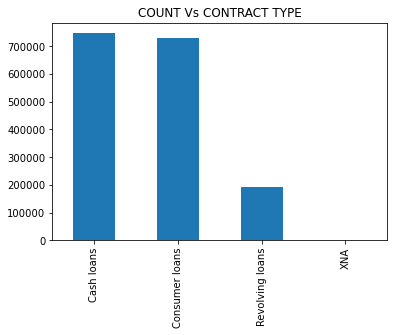

In [130]:
df2.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.title("COUNT Vs CONTRACT TYPE")
plt.show()

## Observation

Number of people appying for cash loans and consumer loans are much higher than revolving loans

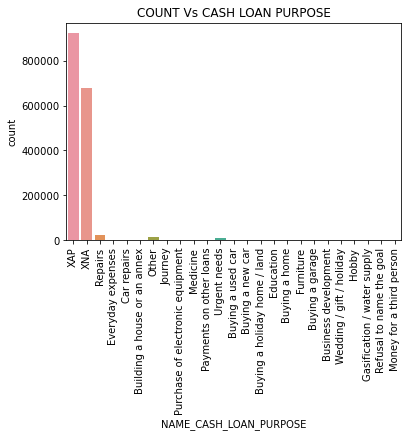

In [131]:
sns.countplot(data=df2,x='NAME_CASH_LOAN_PURPOSE')
plt.xticks(rotation = 90)
plt.title("COUNT Vs CASH LOAN PURPOSE")
plt.show()

### Filter the dataset  for NAME_CASH_LOAN_PURPOSE without XNA and XAP so as to get more insight

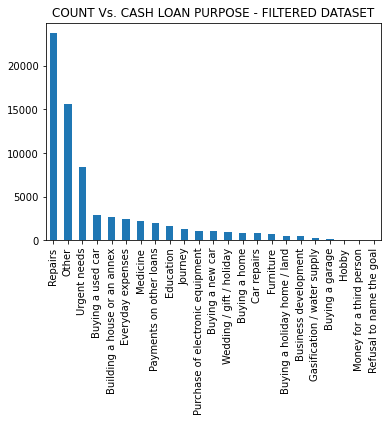

In [132]:
df3 = df2[(df2['NAME_CASH_LOAN_PURPOSE']!='XNA') & (df2['NAME_CASH_LOAN_PURPOSE']!='XAP')]
df3.NAME_CASH_LOAN_PURPOSE.value_counts().plot.bar()
plt.title("COUNT Vs. CASH LOAN PURPOSE - FILTERED DATASET")
plt.show()

## Observation:
1. Maximum number of people are applying for loan for repair purpose
2. Secondly people applies, for other reasons
3. People also require loan for urgent needs which are not specified
4. People applies loan for buying a used car, building a house.


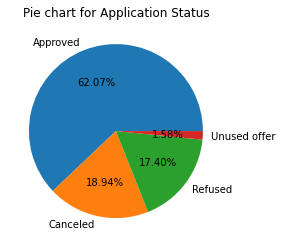

In [133]:
plt.pie(df2['NAME_CONTRACT_STATUS'].value_counts(), labels = df2['NAME_CONTRACT_STATUS'].value_counts().index, autopct='%1.2f%%')   
plt.title('Pie chart for Application Status')
plt.show()

## Observation
1. 62% of loan applications have been approved 

In [134]:
#function to plot bar
def cat_plot_pa(col):
    #df2[col].value_counts(normalize=True).plot.bar()
    sns.countplot(data=df2, x=col)
    plt.title("Distribtution of %s"%col)
    plt.xlabel(df2[col].name)
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

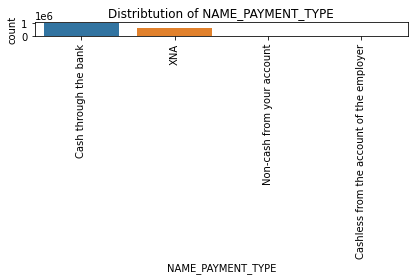

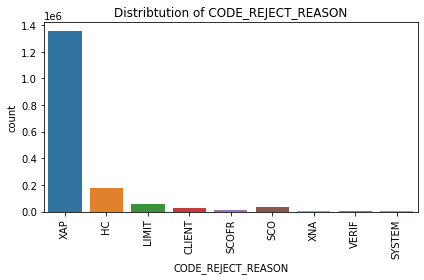

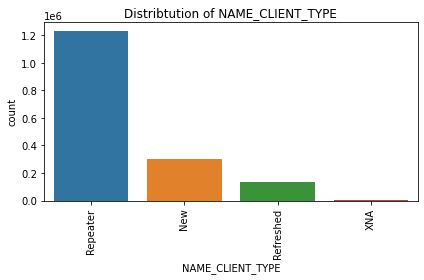

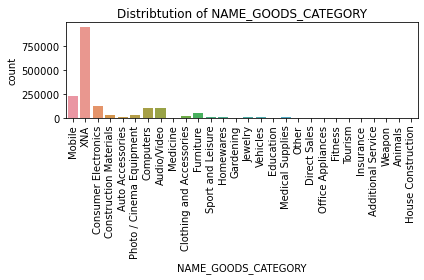

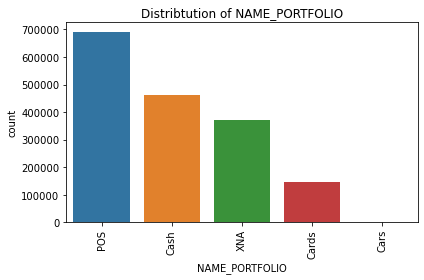

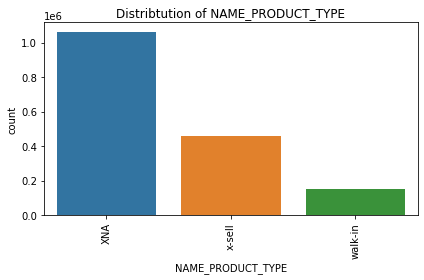

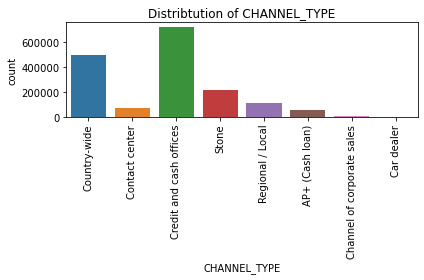

In [135]:
list = ['NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE']

for i in list:
    cat_plot_pa(i)

## Observation
1. Maximum number of people chose to pay from bank
2. The application rejected highly due to XAP reason which are unspacified reasons
3. Maximum number of old clients are applying for the loan again
4. Other than XNA, people are applying loan for mostly mobile phones. 
5. other than mobile phones people are taking loans for consumer electronics, computers, audio/vedio & furnitures

In [136]:
df2.isin(['XNA','XAP']).mean().reset_index().sort_values(0)

,index,0
0,SK_ID_PREV,0.000000
29,DAYS_LAST_DUE,0.000000
28,DAYS_LAST_DUE_1ST_VERSION,0.000000
27,DAYS_FIRST_DUE,0.000000
26,DAYS_FIRST_DRAWING,0.000000
25,PRODUCT_COMBINATION,0.000000
23,CNT_PAYMENT,0.000000
21,SELLERPLACE_AREA,0.000000
20,CHANNEL_TYPE,0.000000
30,DAYS_TERMINATION,0.000000


y=0
fig, axes = plt.subplots(4,2, figsize = (15,10))
for i in list:
    df4 = df2[(df2[i]!='XNA') & (df2[i]!='XAP')]          ##this is will create a dataset using loop not having XNA & XAP value
    sns.countplot(data=df4, x=df4[i], ax=axes.flatten()[y])
    #plt.title('Count plot for %s'%i)
    plt.xticks(rotation = 90)
    #plt.xlabel(df3[i].name)
    y=y+1
fig.tight_layout()
plt.show()    

# Bivariate Analysis

In [137]:
con_col_pa

['SELLERPLACE_AREA',
 'DAYS_TERMINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_LAST_DUE',
 'DAYS_FIRST_DUE',
 'DAYS_DECISION',
 'DAYS_LAST_DUE_1ST_VERSION',
 'AMT_CREDIT',
 'AMT_APPLICATION',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY']

In [138]:
cat_col_pa

['NFLAG_INSURED_ON_APPROVAL',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_PRODUCT_TYPE',
 'NAME_CONTRACT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_PAYMENT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_YIELD_GROUP',
 'NAME_PORTFOLIO',
 'WEEKDAY_APPR_PROCESS_START',
 'CHANNEL_TYPE',
 'CODE_REJECT_REASON',
 'NAME_SELLER_INDUSTRY',
 'PRODUCT_COMBINATION',
 'HOUR_APPR_PROCESS_START',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_GOODS_CATEGORY',
 'CNT_PAYMENT']

In [139]:
df2.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73.0,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,182.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.61500,422820.0,504805.5,349762.5,THURSDAY,11,Y,1,XNA,Approved,164.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,182.0,916.0,2989.5,3111.5,1.0
2,2523466,122040,Cash loans,15060.73500,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301.0,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,2989.5,3111.5,1.0
3,2819243,176158,Cash loans,30739.42125,422820.0,470790.0,349762.5,MONDAY,7,Y,1,XNA,Approved,512.0,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,30739.42125,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781.0,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,1.0,XNA,24.0,high,Cash Street: high,365243.0,831.0,361.0,537.0,499.0,0.0


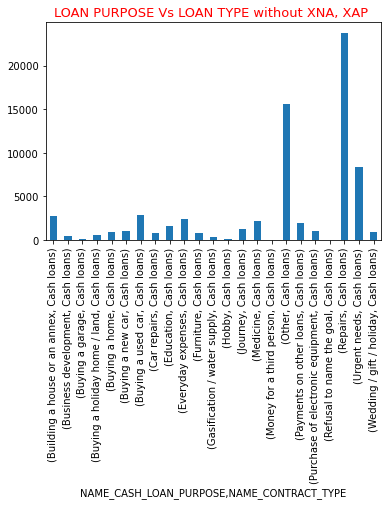

In [140]:
df3.groupby('NAME_CASH_LOAN_PURPOSE')['NAME_CONTRACT_TYPE'].value_counts().plot.bar()
plt.title('LOAN PURPOSE Vs LOAN TYPE without XNA, XAP ', size = 13, color='red')
plt.show()

## Observation:
Maximum number of people are taking cash loans for Repair

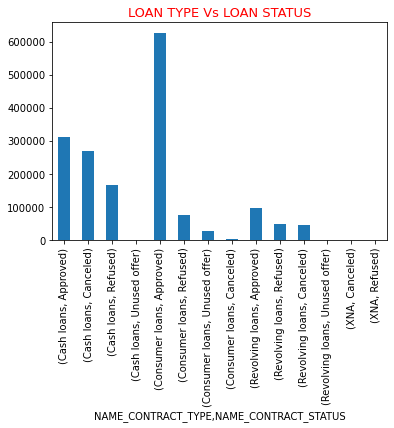

In [141]:
df2.groupby('NAME_CONTRACT_TYPE')['NAME_CONTRACT_STATUS'].value_counts().plot.bar()
plt.title("LOAN TYPE Vs LOAN STATUS", size = 13, color='red')
plt.xticks(rotation = 90)
plt.show()

## Observation
1. Maximum number of loans that are approved is Consumer loans
2. Cancellation of Consumer loans is ver less as compared to cash and  revolving loans

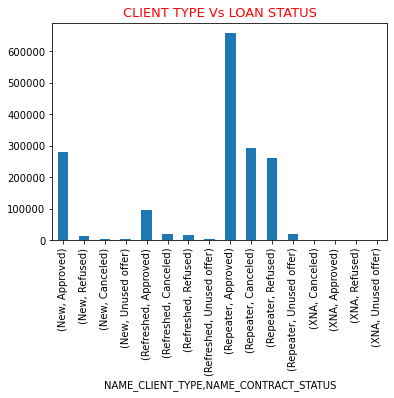

In [142]:
df2.groupby('NAME_CLIENT_TYPE')['NAME_CONTRACT_STATUS'].value_counts().plot.bar()
plt.title("CLIENT TYPE Vs LOAN STATUS", size = 13, color='red')
plt.xticks(rotation = 90)
plt.show()

## Observation:
1. Company approves the loan for maximum number of people who are applying for the new loan again

2. People applying for the first time, company tries not to cancel the loan application that is why cancellation for new people is very less as compared to refreshed and repeaters

### NAME_CLIENT_TYPE is a very important variable as its value gives the direction of thinking about the loan application

In [143]:
df5 = df2.groupby(["NAME_CLIENT_TYPE"])["NAME_GOODS_CATEGORY"].value_counts().reset_index(name='Count')

#df6 = pd.pivot_table(df5,  values='Count',  index=['NAME_GOODS_CATEGORY'],  columns = "NAME_CLIENT_TYPE", aggfunc=np.sum,  fill_value=0)

In [144]:
df5.sort_values(by=['Count'], ascending = False)

,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,Count
53,Repeater,XNA,845282
54,Repeater,Mobile,120079
0,New,Mobile,85802
27,Refreshed,XNA,70195
55,Repeater,Consumer Electronics,63672
56,Repeater,Computers,59090
57,Repeater,Audio/Video,53047
1,New,Consumer Electronics,47480
2,New,Audio/Video,37764
3,New,Computers,36290


In [145]:
df_repeater = df5[(df5['NAME_CLIENT_TYPE']=='Repeater') & (df5['NAME_GOODS_CATEGORY']!='XNA')]
df_new = df5[(df5['NAME_CLIENT_TYPE']=='New') & (df5['NAME_GOODS_CATEGORY']!='XNA')]

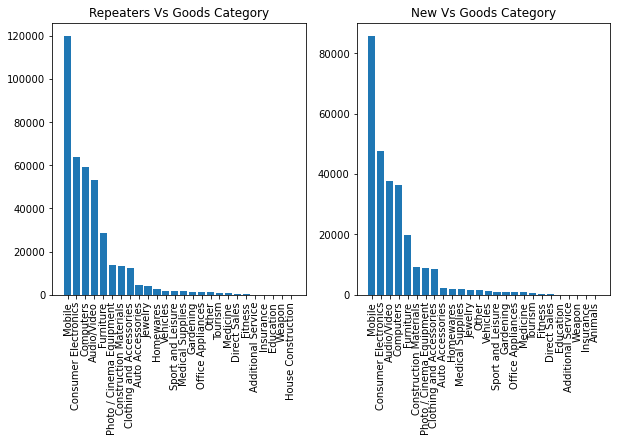

In [146]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

repeater = ax[0].bar(df_repeater.NAME_GOODS_CATEGORY, df_repeater.Count)
ax[0].set_title("Repeaters Vs Goods Category")
ax[0].tick_params(axis='x', rotation=90)

new = ax[1].bar(df_new.NAME_GOODS_CATEGORY,df_new.Count)
ax[1].set_title("New Vs Goods Category")
ax[1].tick_params(axis='x', rotation=90)

plt.show()

## Observation:
1. Maximum number of people ( Repeaters and New ) are appying loan for mobile phones.

In [147]:
df1.head(2)
df1.shape

(307511, 48)

In [148]:
df2.head(2)
df2.shape

(1670214, 32)

In [149]:
df_merge = pd.merge(df1,df2,how = 'inner', on=['SK_ID_CURR'])
df_merge.shape

(1413701, 79)

In [150]:
df_merge.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,age_grp,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary education,Single,House / apartment,0.018801,26.0,2.0,10.0,6.0,Y,Y,N,Y,Y,N,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,0.0,2.0,0.0,3.0,21-30,1038818,Consumer loans,9251.77500,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,203.5,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0,3.0,1.0,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,40-50,1810518,Cash loans,30739.42125,422820.0,504805.5,349762.5,FRIDAY,12,Y,1,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0,3.0,1.0,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,40-50,2636178,Consumer loans,30739.42125,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,203.5,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0,3.0,1.0,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,40-50,2396755,Consumer loans,6737.31000,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,1702.0,1948.5,1980.0,1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary education,Single,House / apartment,0.010032,52.0,1.0,12.0,7.0,Y,Y,Y,Y,Y,N,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,50-60,1564014,Consumer loans,5357.25000,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.

In [151]:
df_merge.corr().sort_values(by = ['TARGET'],ascending = False)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
TARGET,-0.001246,1.000000,0.020313,-0.012588,-0.023033,-0.004671,-0.031907,-0.033723,-0.074927,-0.072714,-0.042957,-0.050775,0.014466,0.056932,0.059700,-0.022448,0.003011,0.006862,0.004159,0.040681,0.049353,0.032757,-0.154904,-0.166325,0.016942,NaN,0.017068,NaN,-0.059061,0.002009,-0.012156,-0.005477,-0.001527,0.000604,-0.027809,-0.002887,-0.039898,-0.026427,0.023689,NaN,-0.029707,-0.024476,-0.021158,-0.020975,-0.018490
REGION_RATING_CLIENT_W_CITY,-0.001085,0.059700,0.024503,-0.227995,-0.093140,-0.126441,-0.093094,-0.505308,-0.019679,0.026689,-0.074918,0.004434,0.030770,0.945596,1.000000,-0.257343,-0.038158,-0.126552,-0.133154,0.045748,0.023126,-0.007139,-0.276781,-0.008869,0.032243,NaN,0.031746,NaN,-0.029610,-0.001356,-0.074361,-0.041674,-0.041525,-0.049351,-0.262786,0.000502,-0.012389,0.025562,0.009846,NaN,-0.010330,-0.007990,-0.000246,-0.000235,-0.002674
REGION_RATING_CLIENT,-0.000981,0.056932,0.025645,-0.209702,-0.084280,-0.112530,-0.085150,-0.505824,-0.021211,0.025103,-0.081800,0.002391,0.029909,1.000000,0.945596,-0.280141,-0.039857,-0.132535,-0.138752,0.035594,0.002275,-0.024568,-0.281922,-0.008518,0.037445,NaN,0.036895,NaN,-0.029968,-0.001095,-0.062938,-0.034874,-0.035188,-0.042354,-0.283169,0.001264,-0.012211,0.030666,0.009653,NaN,-0.010529,-0.009072,-0.001026,-0.001091,-0.002955
REG_CITY_NOT_WORK_CITY,0.000007,0.049353,0.080501,0.027418,-0.014297,0.010530,-0.015388,-0.029414,-0.248662,-0.288098,-0.102239,-0.100194,0.083983,0.002275,0.023126,0.021989,0.127615,0.228755,0.184043,0.435745,1.000000,0.831422,-0.074387,-0.068722,-0.000942,NaN,-0.001116,NaN,-0.053516,-0.000062,-0.025539,-0.024722,-0.023066,-0.033615,0.022506,0.000700,-0.012912,0.017001,-0.024199,NaN,-0.016768,-0.009357,-0.012221,-0.010770,-0.033078
REG_CITY_NOT_LIVE_CITY,-0.001184,0.040681,0.031688,0.010437,-0.025432,-0.001316,-0.026316,-0.049638,-0.177594,-0.130842,-0.065913,-0.069526,0.025899,0.035594,0.045748,0.013273,0.310013,0.132179,0.020156,1.000000,0.435745,0.028170,-0.043199,-0.061498,-0.007255,NaN,-0.007323,NaN,-0.057152,0.001591,-0.021828,-0.022320,-0.022619,-0.027764,0.023931,0.000875,-0.025647,0.019047,-0.022836,NaN,-0.025352,-0.018481,-0.013685,-0.013357,-0.026472
LIVE_CITY_NOT_WORK_CITY,0.001651,0.032757,0.073676,0.030888,0.002688,0.016771,0.002057,-0.002386,-0.168993,-0.233777,-0.076173,-0.066590,0.083224,-0.024568,-0.007139,0.018794,0.008919,0.196587,0.230323,0.028170,0.831422,1.000000,-0.059091,-0.041734,-0.000309,NaN,-0.000505,NaN,-0.028887,-0.000899,-0.013880,-0.012837,-0.010593,-0.019384,0.012572,-0.000439,-0.000759,0.008830,-0.012655,NaN,-0.004619,-0.000012,-0.005850,-0.004491,-0.022656
CNT_PAYMENT,-0.000325,0.023689,-0.046471,0.040760,0.036191,-0.002030,0.034820,-0.001213,0.106468,0.070720,0.028573,0.025673,-0.028102,0.009653,0.009846,-0.008419,-0.008977,-0.015087,-0.012110,-0.022836,-0.024199,-0.012655,0.002347,-0.037862,0.019818,NaN,0.019844,NaN,0.036953,0.009333,0.471847,0.671029,0.640343,0.659373,-0.042077,0.058528,-0.176310,-0.182537,1.000000,NaN,-0.187176,-0.246038,-0.093972,-0.100785,0.149986
CNT_CHILDREN,-0.003099,0.020313,1.000000,0.021115,0.003239,0.030449,-0.000159,-0.021822,-0.362933,-0.25

In [152]:
df11 = df_merge.groupby(['TARGET'])['NAME_CONTRACT_STATUS'].value_counts().reset_index(name='Count')

df12 = pd.pivot_table(df11,  values='Count',  index=['TARGET'],  columns = "NAME_CONTRACT_STATUS", aggfunc=np.sum,  fill_value=0)

In [153]:
df12

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
TARGET,,,,
0,818856,235641,215952,20892
1,67243,23800,29438,1879


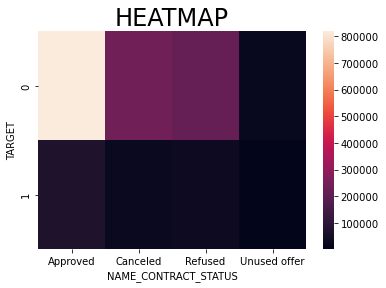

In [154]:
sns.heatmap(df12)
plt.title("HEATMAP", size = 24)
plt.show()

## BIVARIATE ANALYSIS ON MERGED DATA SET TO DRAW INFERENCES

In [155]:
df13 = df_merge.groupby(['NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE_x','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE','NAME_FAMILY_STATUS',])['TARGET'].value_counts().reset_index(name='Count')
df13

,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_FAMILY_STATUS,TARGET,Count
0,Approved,Cash loans,F,N,N,Academic degree,Business Entity Type 3,Accountants,Married,0,2
1,Approved,Cash loans,F,N,N,Academic degree,Business Entity Type 3,Laborers,Single,0,2
2,Approved,Cash loans,F,N,N,Academic degree,Business Entity Type 3,Managers,Widow,0,3
3,Approved,Cash loans,F,N,N,Academic degree,Business Entity Type 3,Sales staff,Single,0,3
4,Approved,Cash loans,F,N,N,Academic degree,Housing,Accountants,Married,1,2
...,...,...,...,...,...,...,...,...,...,...,...
72764,Unused offer,Revolving loans,M,Y,Y,Secondary education,Transport: type 4,Laborers,Civil marriage,0,1
72765,Unused offer,Revolving loans,M,Y,Y,Secondary education,Transport: type 4,Laborers,Married,0,3
72766,Unused offer,Revolving loans,M,Y,Y,Secondary education,Transport: type 4,Sales staff,Civil marriage,0,2
72767,Unused offer,Revolving loans,M,Y,Y,Secondary education,XNA,Laborers,Civil marriage,0,2


In [156]:
# Dataframe for Loan = Refused and Target = 0 (non defaulters)

df15 = df13[(df13['NAME_CONTRACT_STATUS']=='Refused') & (df13['TARGET']==0)].sort_values(by = ['Count'], ascending = False)
df15

,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_FAMILY_STATUS,TARGET,Count
53952,Refused,Cash loans,F,N,Y,Secondary education,XNA,Laborers,Married,0,9726
53958,Refused,Cash loans,F,N,Y,Secondary education,XNA,Laborers,Widow,0,4195
52360,Refused,Cash loans,F,N,Y,Secondary education,Business Entity Type 3,Laborers,Married,0,2527
50532,Refused,Cash loans,F,N,N,Secondary education,XNA,Laborers,Married,0,2496
53956,Refused,Cash loans,F,N,Y,Secondary education,XNA,Laborers,Single,0,2240
...,...,...,...,...,...,...,...,...,...,...,...
61477,Refused,Cash loans,M,Y,Y,Higher education,Self-employed,Realty agents,Civil marriage,0,1
61478,Refused,Cash loans,M,Y,Y,Higher education,Self-employed,Sales staff,Civil marriage,0,1
53640,Refused,Cash loans,F,N,Y,Secondary education,Trade: type 1,Core staff,Single,0,1
53639,Refused,Cash loans,F,N,Y,Secondary education,Trade: type 1,Core staff,Married,0,1


In [157]:
# Using mode to find out the most occuring values.

for i in df15.columns:
    print("Mode of %s"%i,' - ',df15[i].mode())

Mode of NAME_CONTRACT_STATUS  -  0    Refused
dtype: object
Mode of NAME_CONTRACT_TYPE_x  -  0    Cash loans
dtype: object
Mode of CODE_GENDER  -  0    F
dtype: object
Mode of FLAG_OWN_CAR  -  0    N
dtype: object
Mode of FLAG_OWN_REALTY  -  0    Y
dtype: object
Mode of NAME_EDUCATION_TYPE  -  0    Secondary education
dtype: object
Mode of ORGANIZATION_TYPE  -  0    Business Entity Type 3
dtype: object
Mode of OCCUPATION_TYPE  -  0    Laborers
dtype: object
Mode of NAME_FAMILY_STATUS  -  0    Married
dtype: object
Mode of TARGET  -  0    0
dtype: int64
Mode of Count  -  0    1
dtype: int64


In [158]:
# Dataframe for Loan = Approved and Target = 1 (Defaulters)

df16 = df13[(df13['NAME_CONTRACT_STATUS']=='Approved') & (df13['TARGET']==1)].sort_values(by = ['Count'], ascending = False)
df16

,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_FAMILY_STATUS,TARGET,Count
9207,Approved,Cash loans,F,N,Y,Secondary education,XNA,Laborers,Married,1,2072
9213,Approved,Cash loans,F,N,Y,Secondary education,XNA,Laborers,Widow,1,1022
6904,Approved,Cash loans,F,N,Y,Secondary education,Business Entity Type 3,Laborers,Married,1,992
17842,Approved,Cash loans,M,N,Y,Secondary education,Business Entity Type 3,Laborers,Married,1,868
8636,Approved,Cash loans,F,N,Y,Secondary education,Self-employed,Sales staff,Married,1,812
...,...,...,...,...,...,...,...,...,...,...,...
3963,Approved,Cash loans,F,N,Y,Higher education,Agriculture,Core staff,Widow,1,1
21128,Approved,Cash loans,M,Y,Y,Higher education,Business Entity Type 1,Laborers,Separated,1,1
10493,Approved,Cash loans,F,Y,N,Secondary education,Housing,Accountants,Married,1,1
3978,Approved,Cash loans,F,N,Y,Higher education,Bank,Accountants,Civil marriage,1,1


In [159]:
# Using mode to find out the most occuring values.
for i in df16.columns:
    print("Mode of %s"%i,' - ',df16[i].mode())

Mode of NAME_CONTRACT_STATUS  -  0    Approved
dtype: object
Mode of NAME_CONTRACT_TYPE_x  -  0    Cash loans
dtype: object
Mode of CODE_GENDER  -  0    F
dtype: object
Mode of FLAG_OWN_CAR  -  0    N
dtype: object
Mode of FLAG_OWN_REALTY  -  0    Y
dtype: object
Mode of NAME_EDUCATION_TYPE  -  0    Secondary education
dtype: object
Mode of ORGANIZATION_TYPE  -  0    Business Entity Type 3
dtype: object
Mode of OCCUPATION_TYPE  -  0    Laborers
dtype: object
Mode of NAME_FAMILY_STATUS  -  0    Married
dtype: object
Mode of TARGET  -  0    1
dtype: int64
Mode of Count  -  0    1
dtype: int64
